# 데이터 준비

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import os
from glob import glob
import math
import re

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!ls '/gdrive/MyDrive/0. 인공지능 학습/아이펠 대전 3기/5. 해커톤/1차 해커톤/data'

디즈니	아마존	파라마운트  넷플릭스


In [4]:
data_dir = '/gdrive/MyDrive/0. 인공지능 학습/아이펠 대전 3기/5. 해커톤/1차 해커톤/processed_data4'
save_data_dir = '/gdrive/MyDrive/0. 인공지능 학습/아이펠 대전 3기/5. 해커톤/1차 해커톤/processed_data5'
platform_names = ["amazon", "netflix", "disney", "paramount"]

credits_path = os.path.join(data_dir, "merged_credits.csv")
amazon_titles_path = os.path.join(data_dir, "merged_titles.csv")

In [5]:
credits = pd.read_csv(credits_path)
titles = pd.read_csv(amazon_titles_path)

# 개별 파라미터에 대한 시각화

## OTT 별 분포 시각화

### 컨텐츠 총량 비교

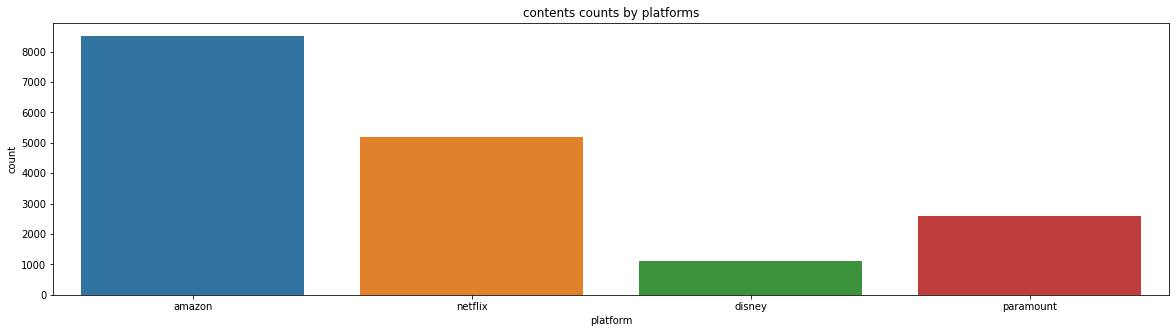

In [6]:
plt.figure(figsize=(20, 5))
sns.countplot(x="platform", data=titles)
plt.title("contents counts by platforms")
plt.show()

### 영화/드라마 분포

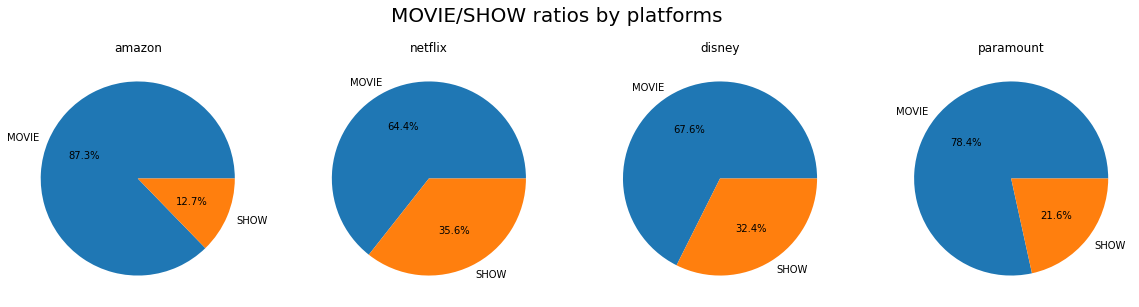

In [7]:
labels = titles["type"].value_counts().index.tolist()

plt.figure(figsize=(20, 5))
for i, platform_name in enumerate(platform_names):
    data_type = titles.loc[titles["platform"] == platform_name]
    data = data_type["type"].value_counts()

    plt.subplot(1, 4, i+1)
    plt.title(platform_name)
    plt.pie(data, labels=labels, autopct='%.1f%%')

plt.suptitle('MOVIE/SHOW ratios by platforms',fontsize=20)
plt.show()

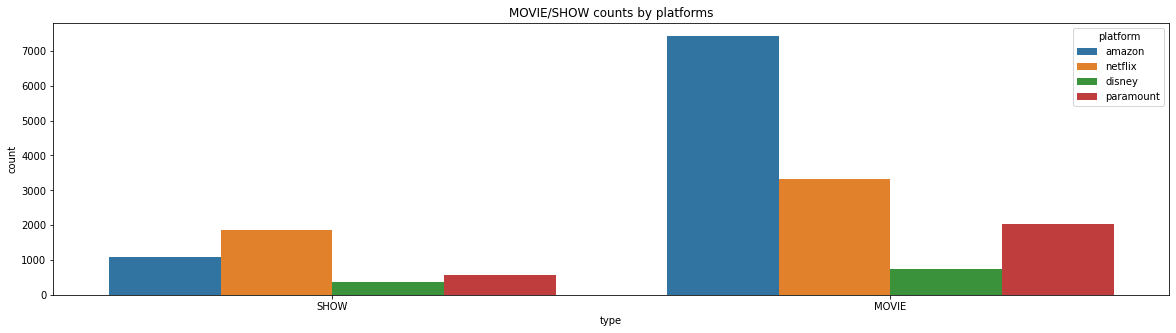

In [8]:
plt.figure(figsize=(20, 5))
sns.countplot(x="type", hue="platform", data=titles)
plt.title("MOVIE/SHOW counts by platforms")
plt.show()

- 회사별로 병합한 원그래프 가능할까?

### 시즌 수

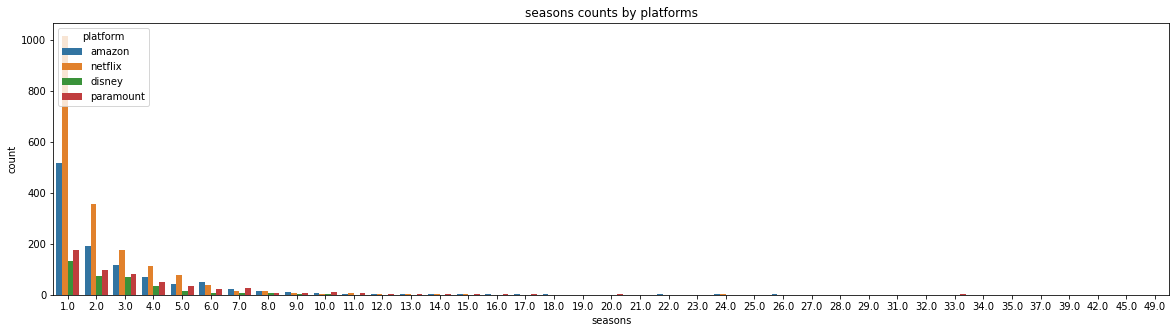

In [9]:
plt.figure(figsize=(20, 5))
sns.countplot(x="seasons", hue="platform", data=titles)
plt.title("seasons counts by platforms")
plt.show()

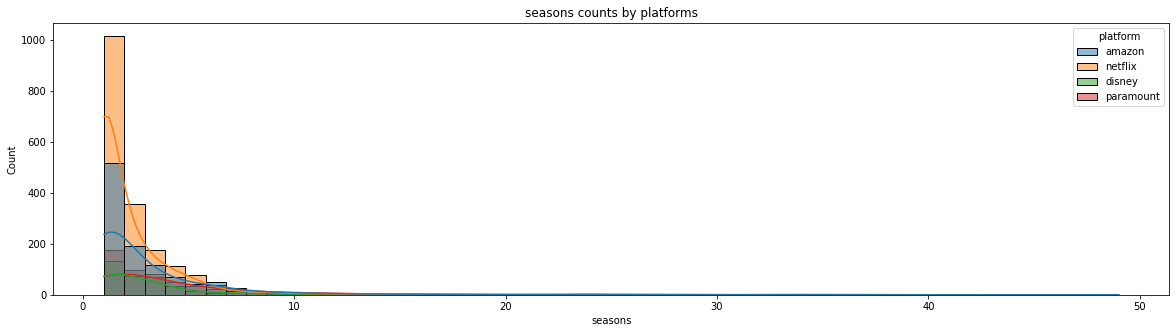

In [10]:
plt.figure(figsize=(20, 5))
sns.histplot(x="seasons", hue="platform", bins=50, kde=True, data=titles)
plt.title("seasons counts by platforms")
plt.show()

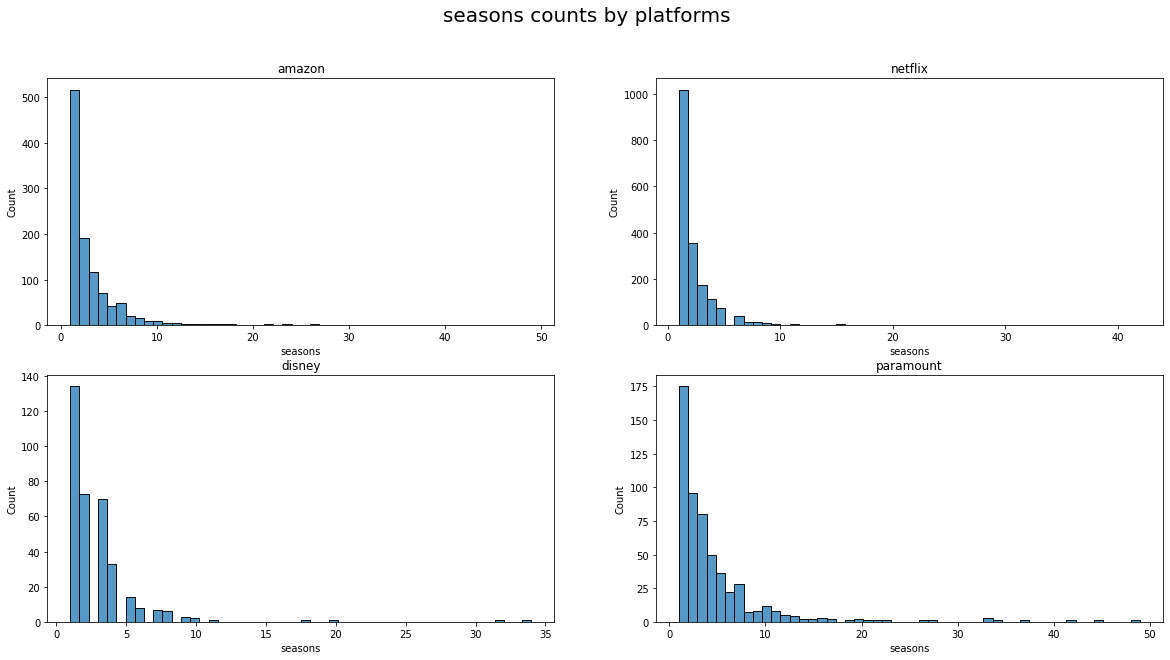

In [11]:
plt.figure(figsize=(20, 10))
for i, platform_name in enumerate(platform_names):
    data = titles.loc[titles["platform"] == platform_name]

    plt.subplot(2, 2, i+1)
    plt.title(platform_name)
    sns.histplot(x="seasons", bins=50, kde=False, data=data)

plt.suptitle('seasons counts by platforms',fontsize=20)
plt.show()

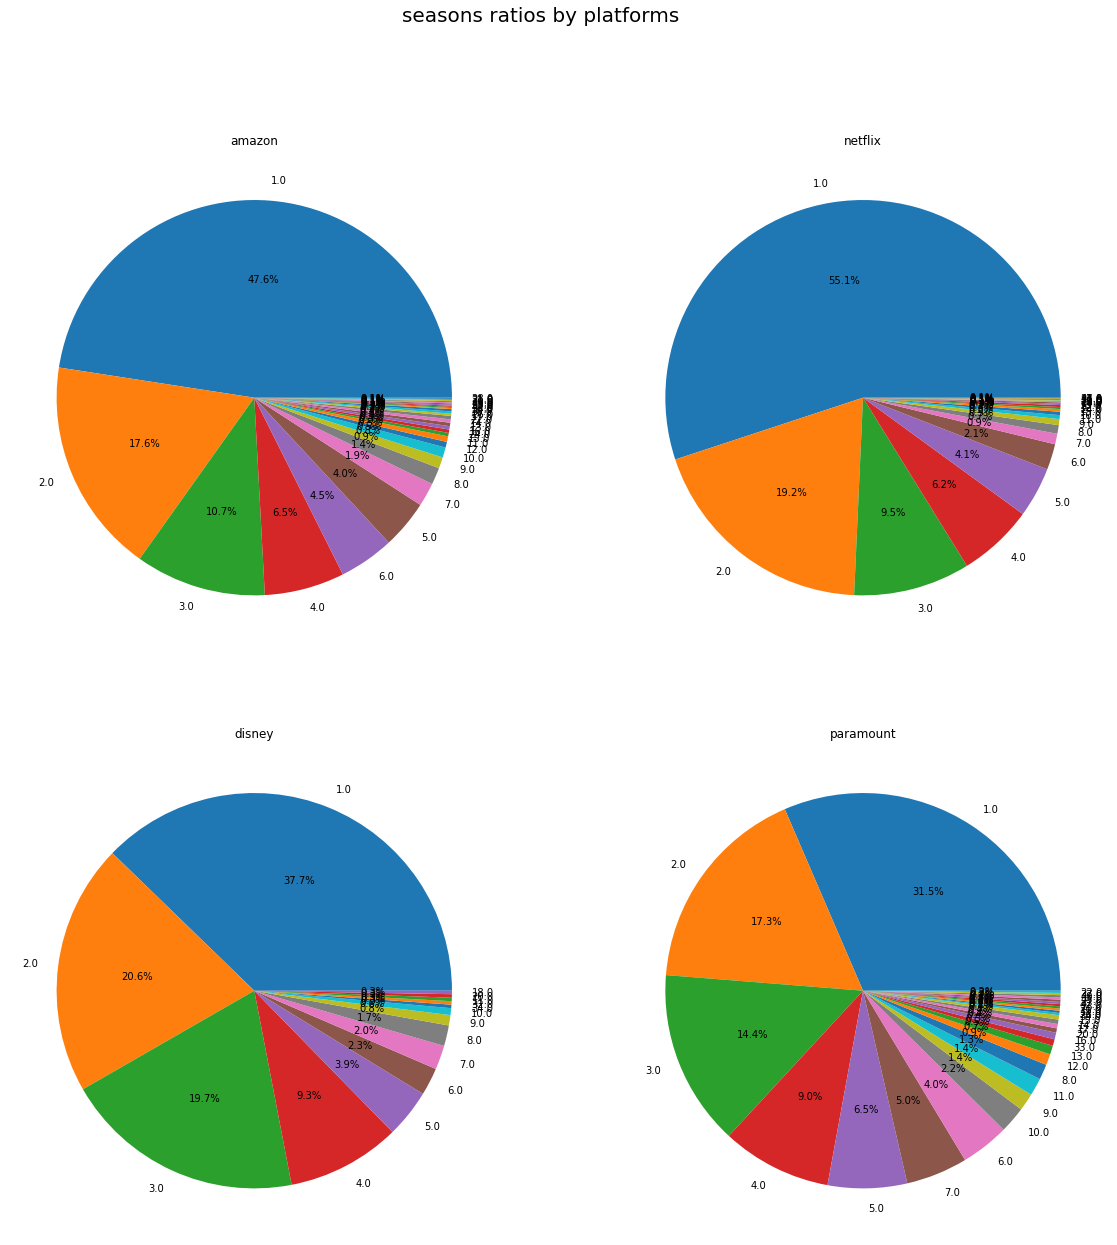

In [12]:
plt.figure(figsize=(20, 20))
for i, platform_name in enumerate(platform_names):
    data = titles.loc[titles["platform"] == platform_name]
    labels = data["seasons"].value_counts().index.tolist()
    data = data["seasons"].value_counts()

    plt.subplot(2, 2, i+1)
    plt.title(platform_name)
    plt.pie(data, labels=labels, autopct='%.1f%%')

plt.suptitle('seasons ratios by platforms',fontsize=20)
plt.show()

### 출시년도

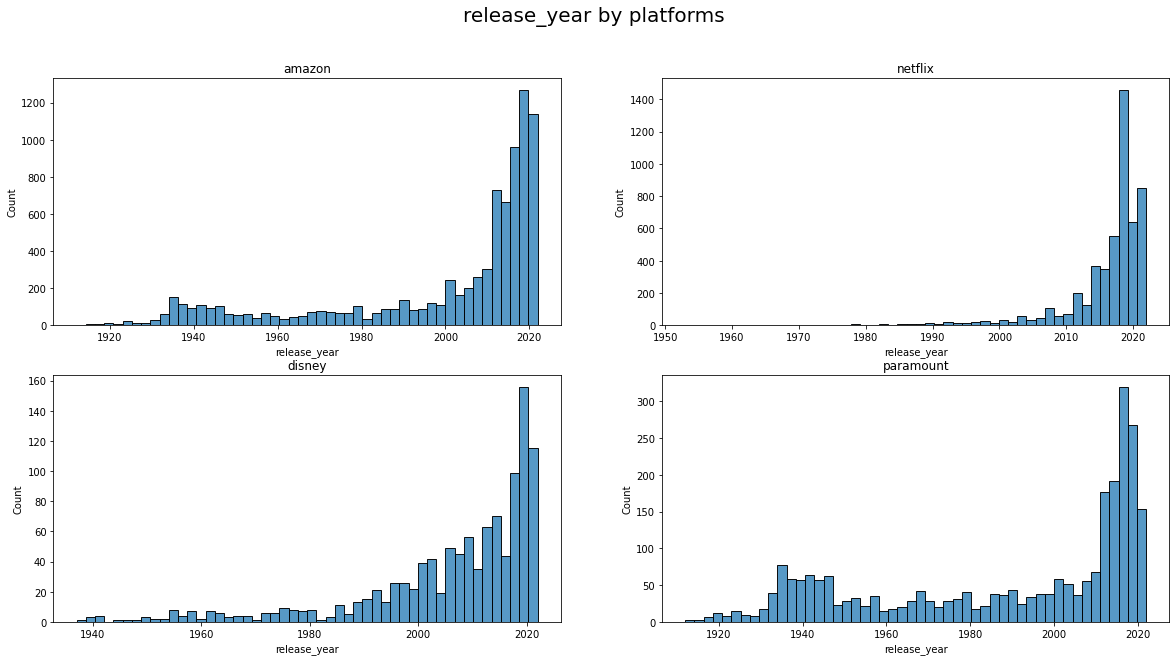

In [13]:
plt.figure(figsize=(20, 10))
for i, platform_name in enumerate(platform_names):
    data = titles.loc[titles["platform"] == platform_name]

    plt.subplot(2, 2, i+1)
    plt.title(platform_name)
    sns.histplot(x="release_year", bins=50, kde=False, data=data)

plt.suptitle('release_year by platforms',fontsize=20)
plt.show()

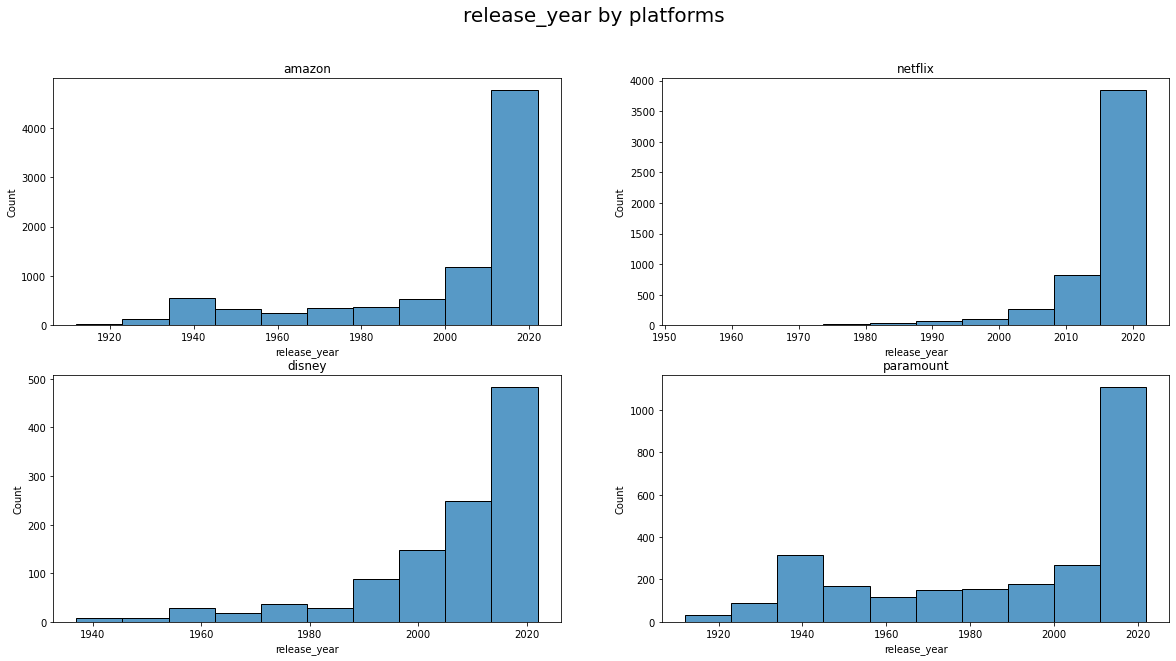

In [14]:
plt.figure(figsize=(20, 10))
for i, platform_name in enumerate(platform_names):
    data = titles.loc[titles["platform"] == platform_name]

    plt.subplot(2, 2, i+1)
    plt.title(platform_name)
    sns.histplot(x="release_year", bins=10, kde=False, data=data)

plt.suptitle('release_year by platforms',fontsize=20)
plt.show()

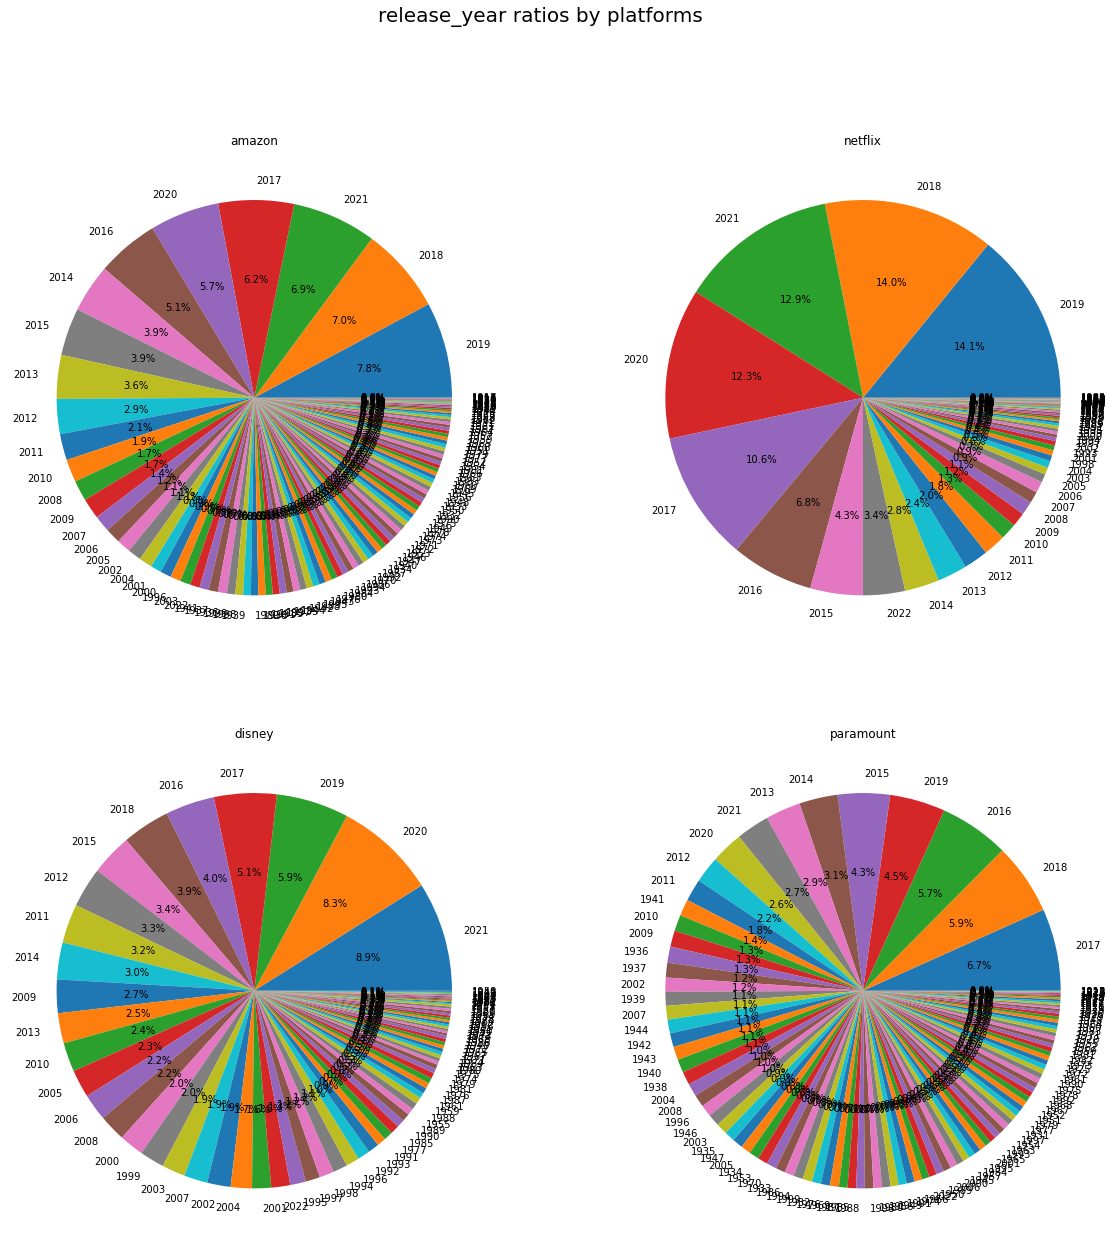

In [15]:
plt.figure(figsize=(20, 20))
for i, platform_name in enumerate(platform_names):
    data = titles.loc[titles["platform"] == platform_name]
    labels = data["release_year"].value_counts().index.tolist()
    data = data["release_year"].value_counts()

    plt.subplot(2, 2, i+1)
    plt.title(platform_name)
    plt.pie(data, labels=labels, autopct='%.1f%%')

plt.suptitle('release_year ratios by platforms',fontsize=20)
plt.show()

### 상영시간

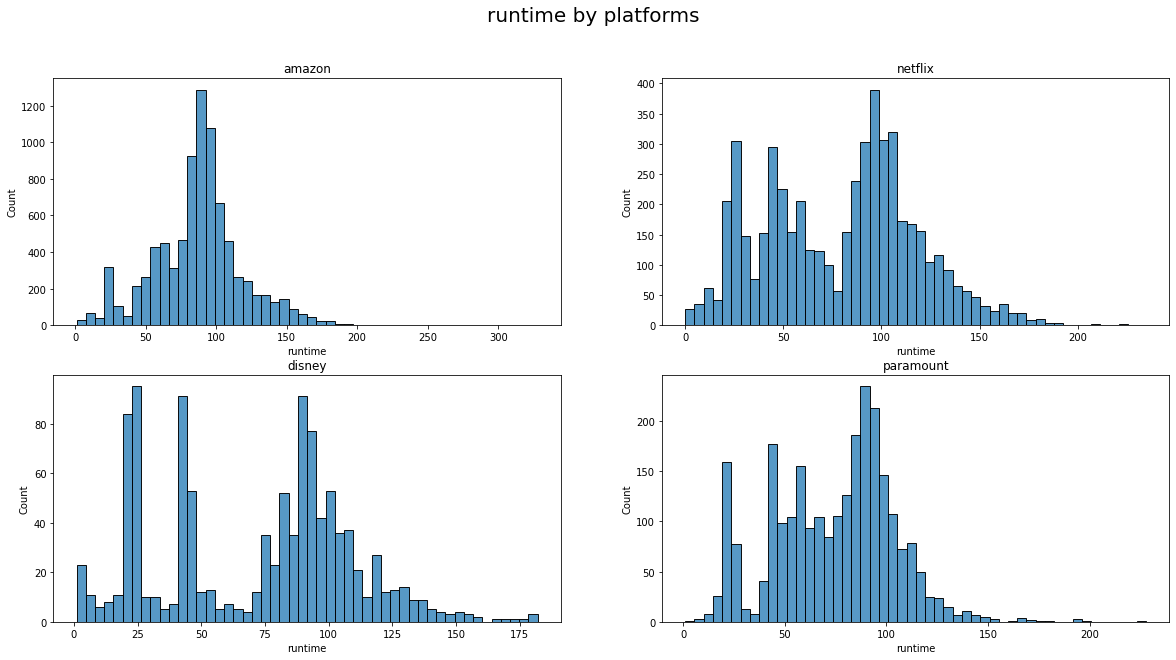

In [16]:
plt.figure(figsize=(20, 10))
for i, platform_name in enumerate(platform_names):
    data = titles.loc[titles["platform"] == platform_name]

    plt.subplot(2, 2, i+1)
    plt.title(platform_name)
    sns.histplot(x="runtime", bins=50, kde=False, data=data)

plt.suptitle('runtime by platforms',fontsize=20)
plt.show()

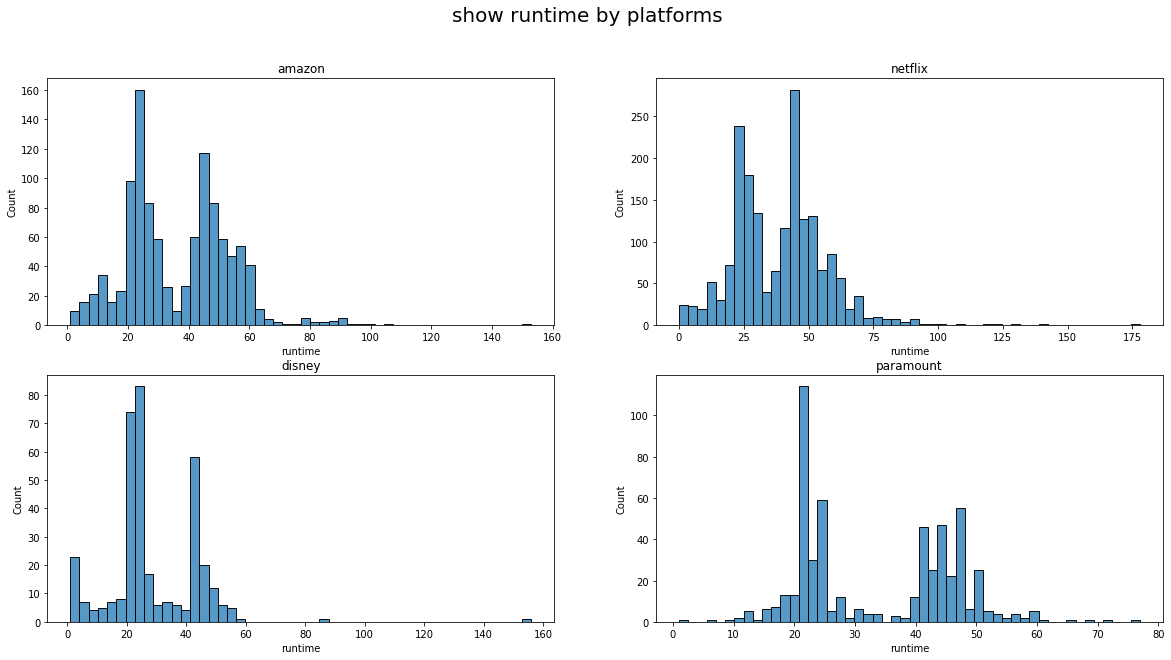

In [17]:
plt.figure(figsize=(20, 10))
for i, platform_name in enumerate(platform_names):
    data = titles.loc[titles["platform"] == platform_name]
    data = data.loc[data["type"] == "SHOW"]

    plt.subplot(2, 2, i+1)
    plt.title(platform_name)
    sns.histplot(x="runtime", bins=50, kde=False, data=data)

plt.suptitle('show runtime by platforms',fontsize=20)
plt.show()

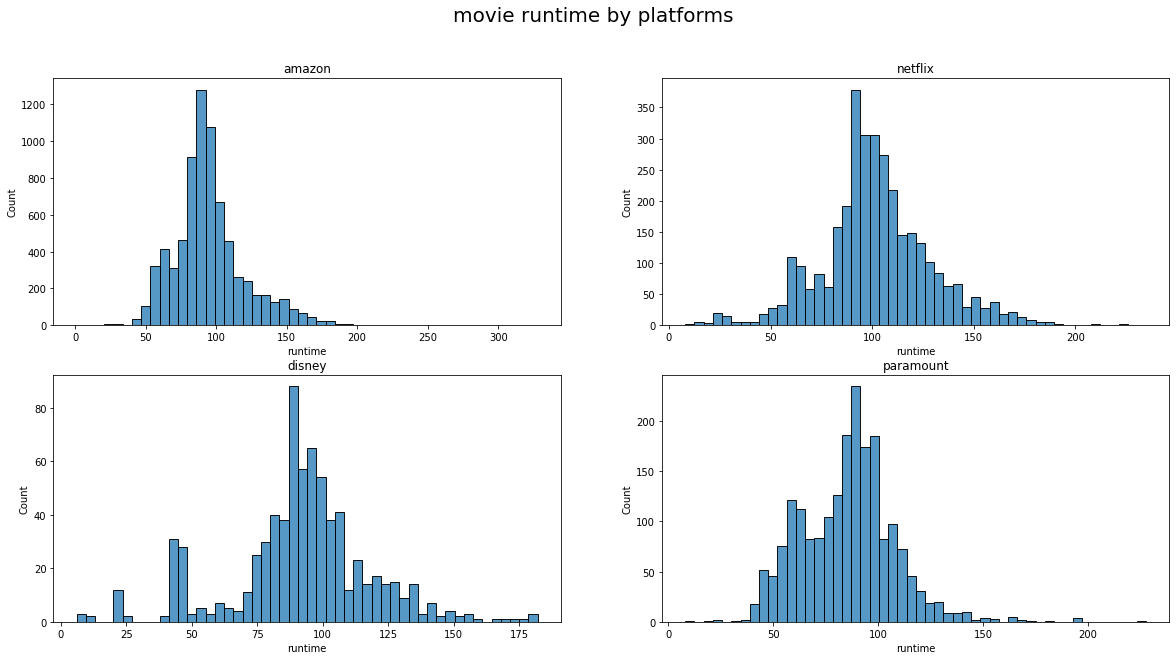

In [18]:
plt.figure(figsize=(20, 10))
for i, platform_name in enumerate(platform_names):
    data = titles.loc[titles["platform"] == platform_name]
    data = data.loc[data["type"] == "MOVIE"]

    plt.subplot(2, 2, i+1)
    plt.title(platform_name)
    sns.histplot(x="runtime", bins=50, kde=False, data=data)

plt.suptitle('movie runtime by platforms',fontsize=20)
plt.show()

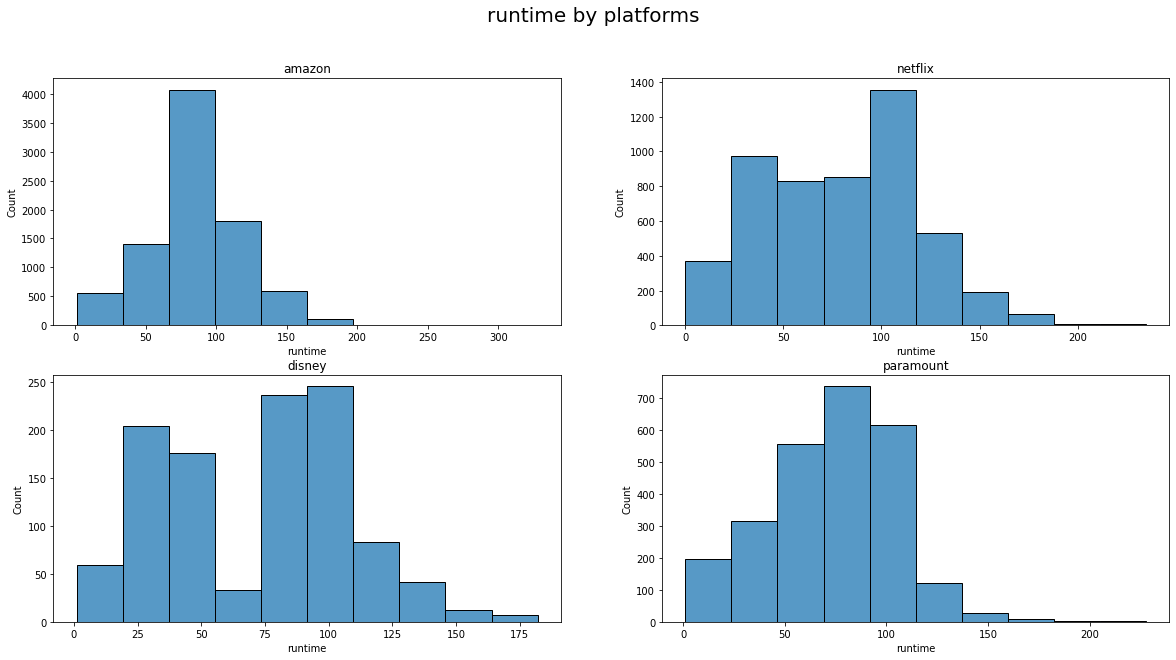

In [19]:
plt.figure(figsize=(20, 10))
for i, platform_name in enumerate(platform_names):
    data = titles.loc[titles["platform"] == platform_name]

    plt.subplot(2, 2, i+1)
    plt.title(platform_name)
    sns.histplot(x="runtime", bins=10, kde=False, data=data)

plt.suptitle('runtime by platforms',fontsize=20)
plt.show()

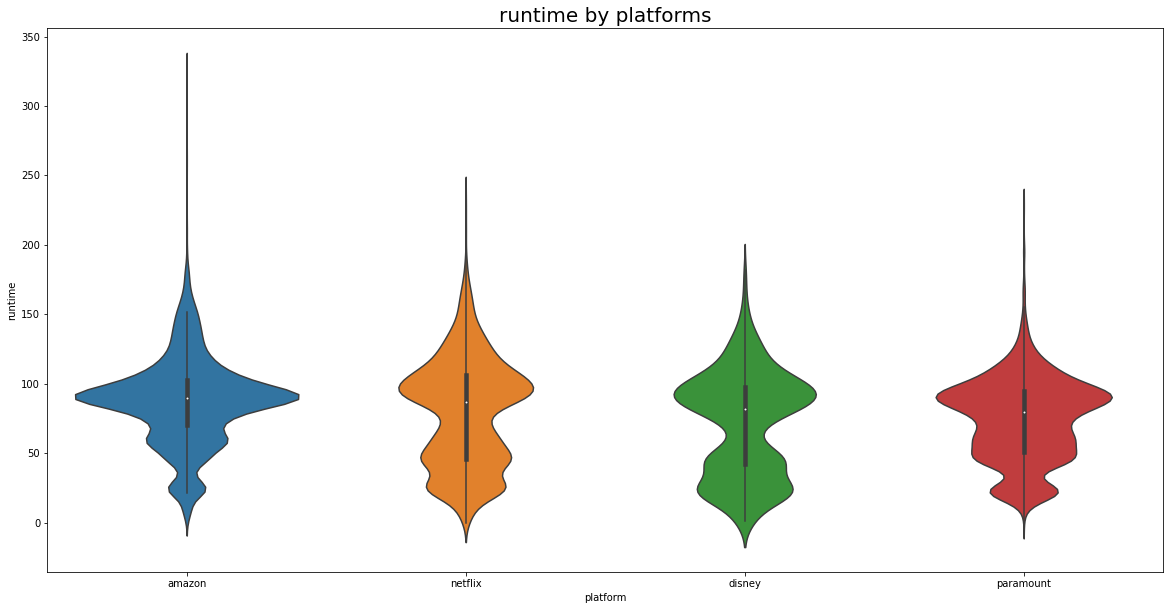

In [20]:
plt.figure(figsize=(20, 10))
sns.violinplot(x="platform", y="runtime", data=titles)
plt.title("runtime by platforms", fontsize=20)
plt.show()

# 연령 제한

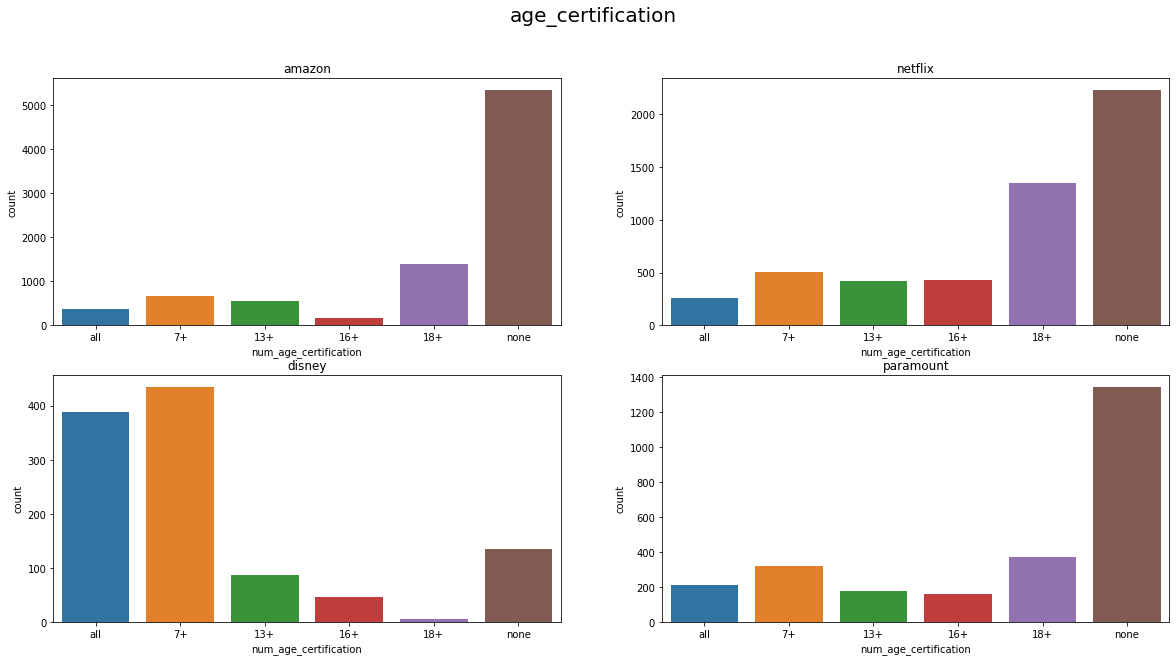

In [21]:
order = ["all", "7+", "13+", "16+", "18+", "none"]
# order = ["all", "7+", "13+", "16+", "18+"]

plt.figure(figsize=(20, 10))
for i, platform_name in enumerate(platform_names):
    data = titles.loc[titles["platform"] == platform_name]

    plt.subplot(2, 2, i+1)
    plt.title(platform_name)
    sns.countplot(x="num_age_certification", data=data, order=order)

plt.suptitle('age_certification',fontsize=20)
plt.show()

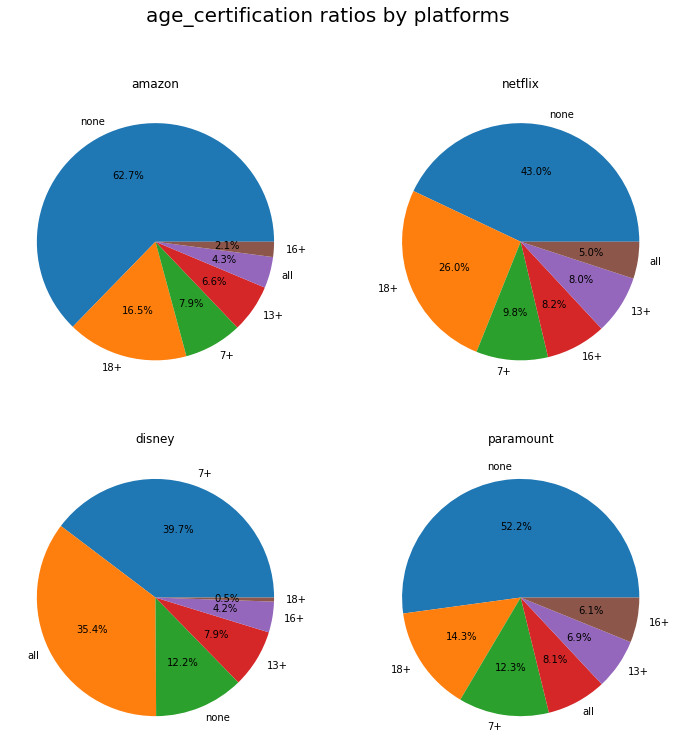

In [41]:
# labels = titles["num_age_certification"].value_counts().index.tolist()

plt.figure(figsize=(12, 12))
for i, platform_name in enumerate(platform_names):
    data = titles.loc[titles["platform"] == platform_name]
    labels = data["num_age_certification"].value_counts().index.tolist()
    data = data["num_age_certification"].value_counts()

    plt.subplot(2, 2, i+1)
    plt.title(platform_name)
    plt.pie(data, labels=labels, autopct='%.1f%%')

plt.suptitle('age_certification ratios by platforms',fontsize=20)
plt.show()

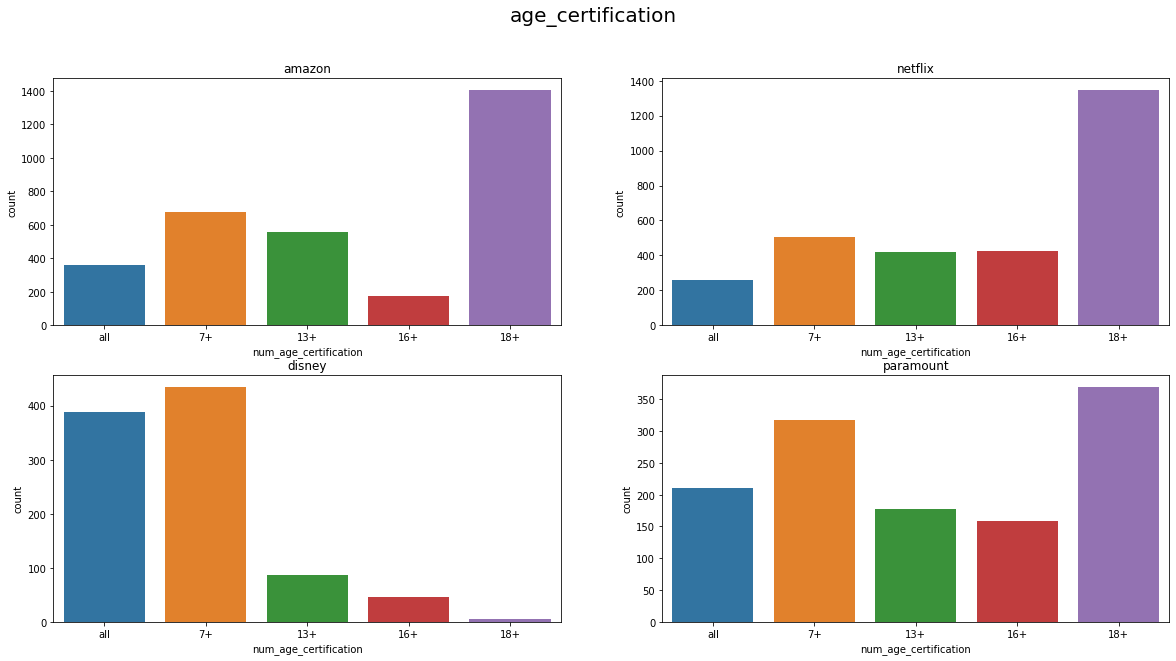

In [23]:
# order = ["all", "7+", "13+", "16+", "18+", "none"]
order = ["all", "7+", "13+", "16+", "18+"]

plt.figure(figsize=(20, 10))
for i, platform_name in enumerate(platform_names):
    data = titles.loc[titles["platform"] == platform_name]

    plt.subplot(2, 2, i+1)
    plt.title(platform_name)
    sns.countplot(x="num_age_certification", data=data, order=order)

plt.suptitle('age_certification',fontsize=20)
plt.show()

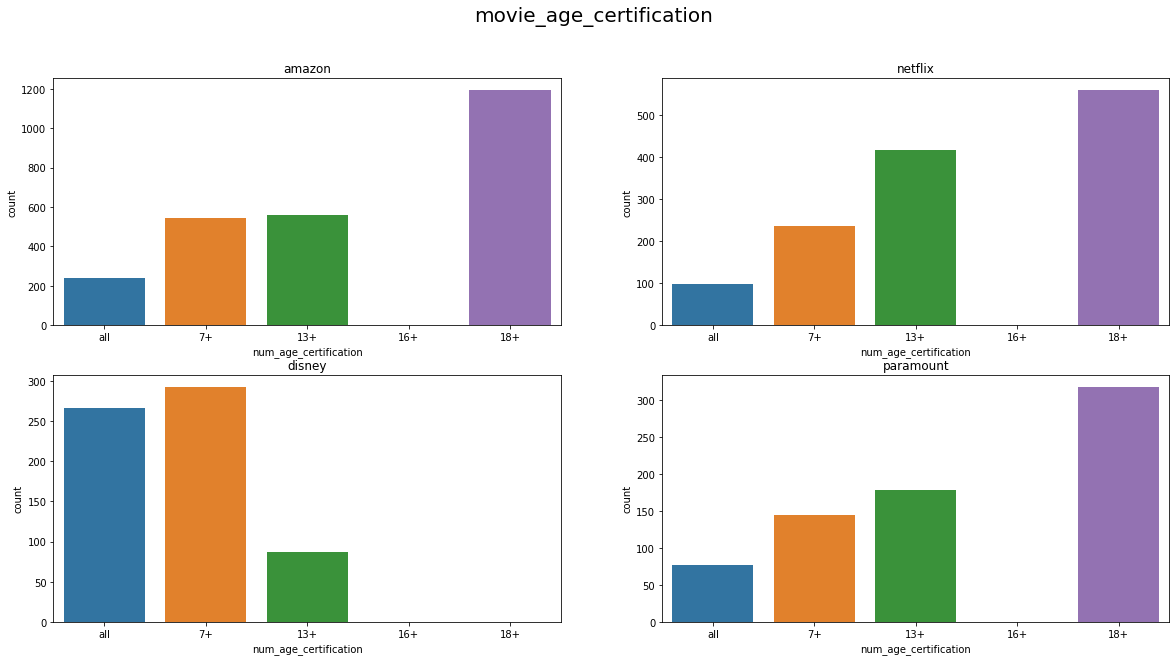

In [24]:
# order = ["all", "7+", "13+", "16+", "18+", "none"]
order = ["all", "7+", "13+", "16+", "18+"]

plt.figure(figsize=(20, 10))
for i, platform_name in enumerate(platform_names):
    data = titles.loc[titles["platform"] == platform_name]
    data = data.loc[data["type"] == "MOVIE"]

    plt.subplot(2, 2, i+1)
    plt.title(platform_name)
    sns.countplot(x="num_age_certification", data=data, order=order)

plt.suptitle('movie_age_certification',fontsize=20)
plt.show()

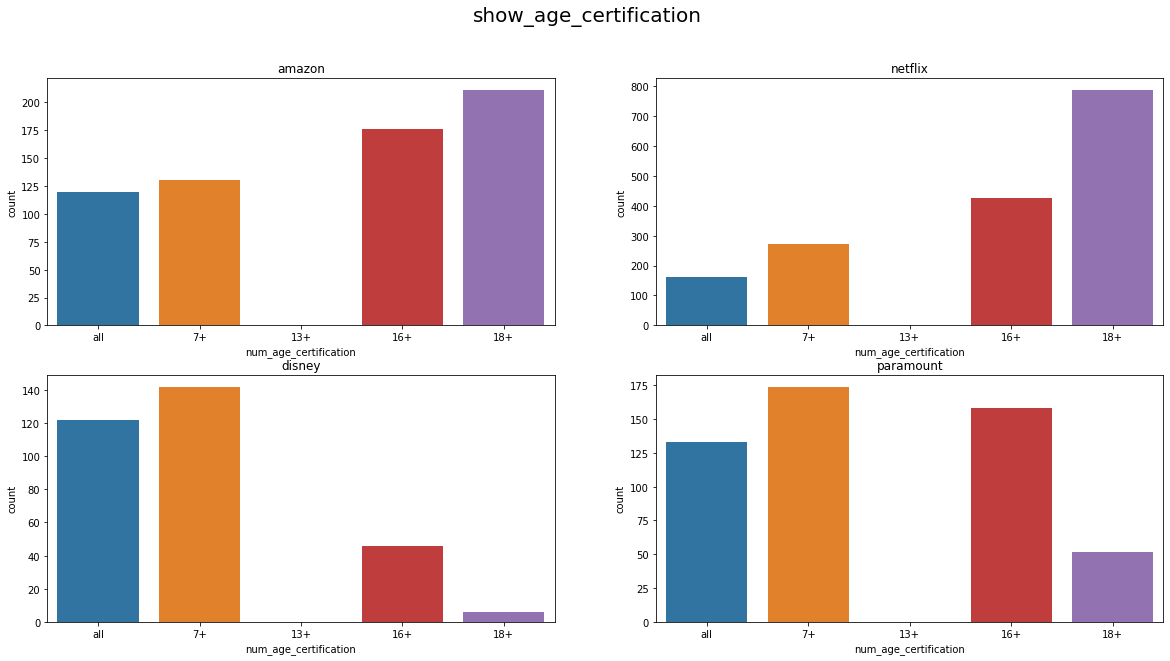

In [25]:
# order = ["all", "7+", "13+", "16+", "18+", "none"]
order = ["all", "7+", "13+", "16+", "18+"]

plt.figure(figsize=(20, 10))
for i, platform_name in enumerate(platform_names):
    data = titles.loc[titles["platform"] == platform_name]
    data = data.loc[data["type"] == "SHOW"]

    plt.subplot(2, 2, i+1)
    plt.title(platform_name)
    sns.countplot(x="num_age_certification", data=data, order=order)

plt.suptitle('show_age_certification',fontsize=20)
plt.show()

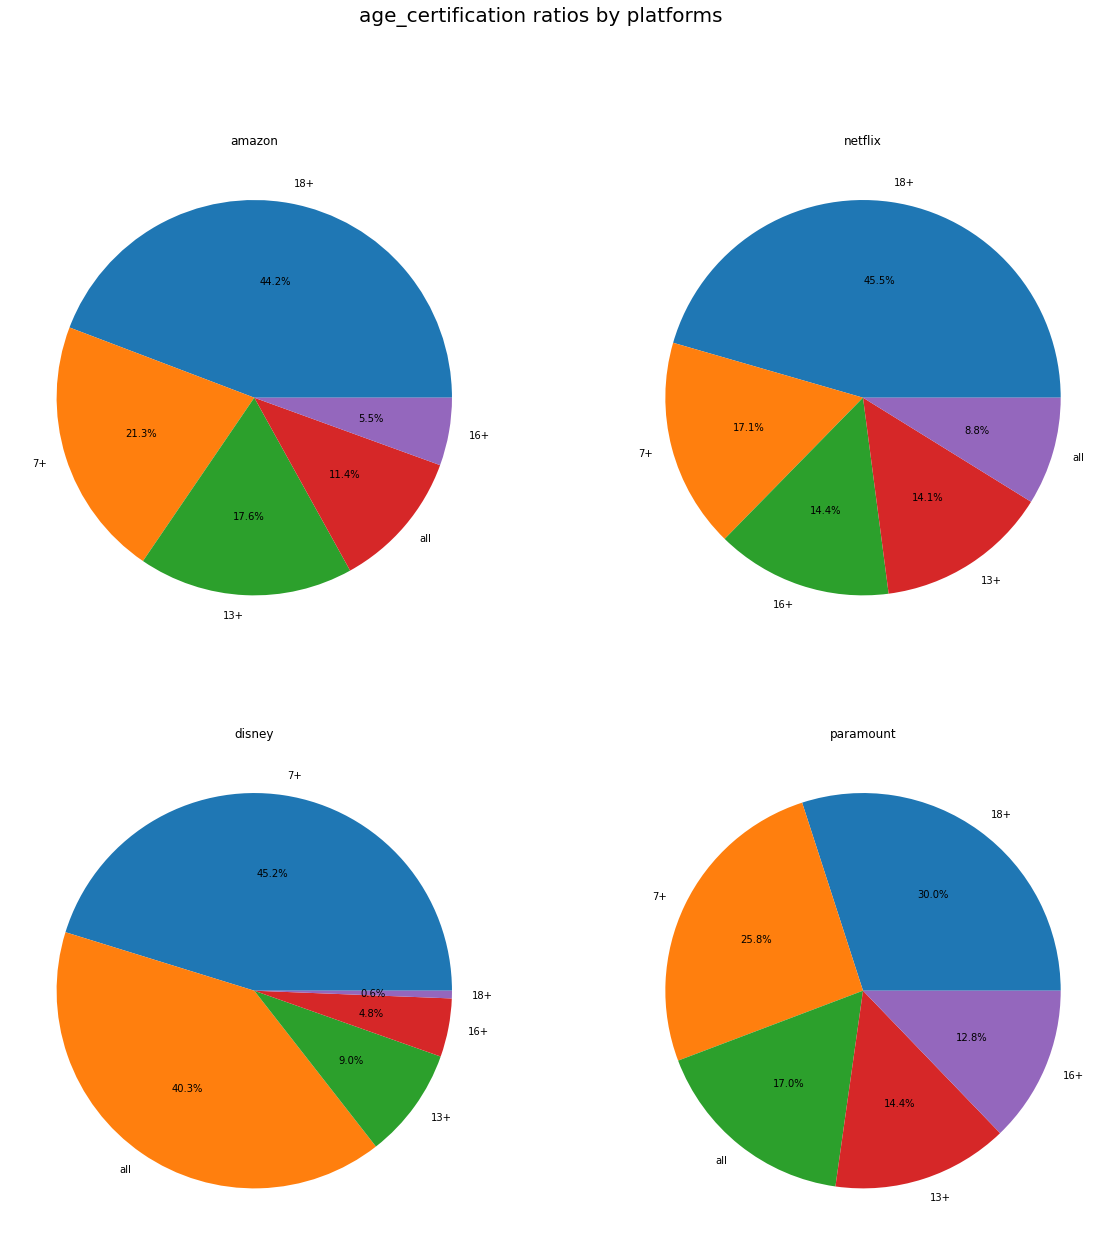

In [42]:
# labels = titles["num_age_certification"].value_counts().index.tolist()
# labels = labels[1:]

plt.figure(figsize=(20, 20))
for i, platform_name in enumerate(platform_names):
    data = titles.loc[titles["platform"] == platform_name]
    data = data.loc[data["num_age_certification"] != "none"]
    labels = data["num_age_certification"].value_counts().index.tolist()
    data = data["num_age_certification"].value_counts()

    plt.subplot(2, 2, i+1)
    plt.title(platform_name)
    plt.pie(data, labels=labels, autopct='%.1f%%')

plt.suptitle('age_certification ratios by platforms',fontsize=20)
plt.show()

### 장르
- 장르 컬럼의 인덱스는 156~176

In [27]:
titles_columns = titles.columns
titles_columns[156:176]

Index(['family', 'war', 'fantasy', 'romance', 'sport', 'action', 'music',
       'thriller', 'reality', 'crime', 'history', 'animation', 'horror',
       'documentation', 'european', 'western', 'scifi', 'drama', 'comedy',
       'none_genre'],
      dtype='object')

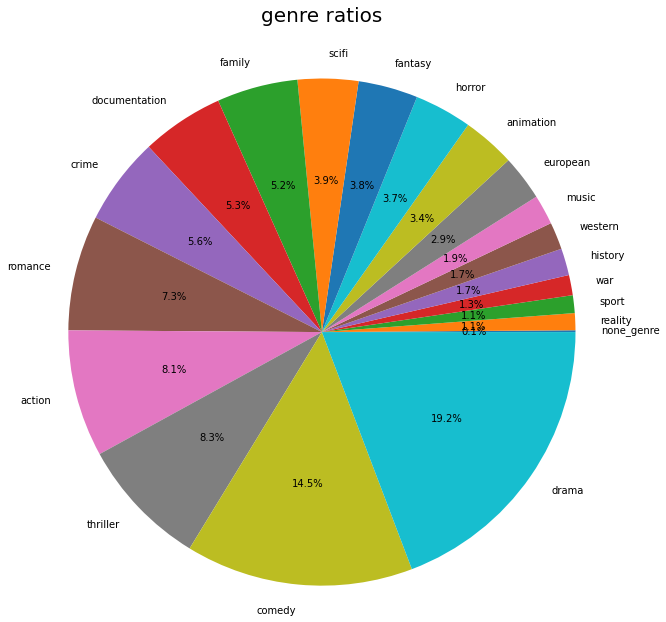

In [28]:
# 데이터 프레임 컬럼 생성
genre_names = list(titles_columns[156:176])

# 데이터 프레임 값 생성
genre_counts = titles.iloc[:, 156:176]
genre_data = list(genre_counts.sum())
genre_names = genre_counts.sum().index.tolist()

# 데이터 정렬
index = np.argsort(np.array(genre_data))
data = []
labels = []
for i in index:
    data.append(genre_data[i])
    labels.append(genre_names[i])

plt.figure(figsize=(10, 10))
plt.pie(data, labels=labels, autopct='%0.1f%%')
plt.title("genre ratios", fontsize=20, pad=40)
plt.axis('equal')
plt.show()

In [29]:
def make_data_labels(titles):
    # 데이터 프레임 값 생성
    genre_counts = titles.iloc[:, 156:176]
    genre_data = list(genre_counts.sum())
    genre_names = genre_counts.sum().index.tolist()

    # 데이터 정렬
    index = np.argsort(np.array(genre_data))
    data = []
    labels = []
    for i in index:
        data.append(genre_data[i])
        labels.append(genre_names[i])

    return data, labels

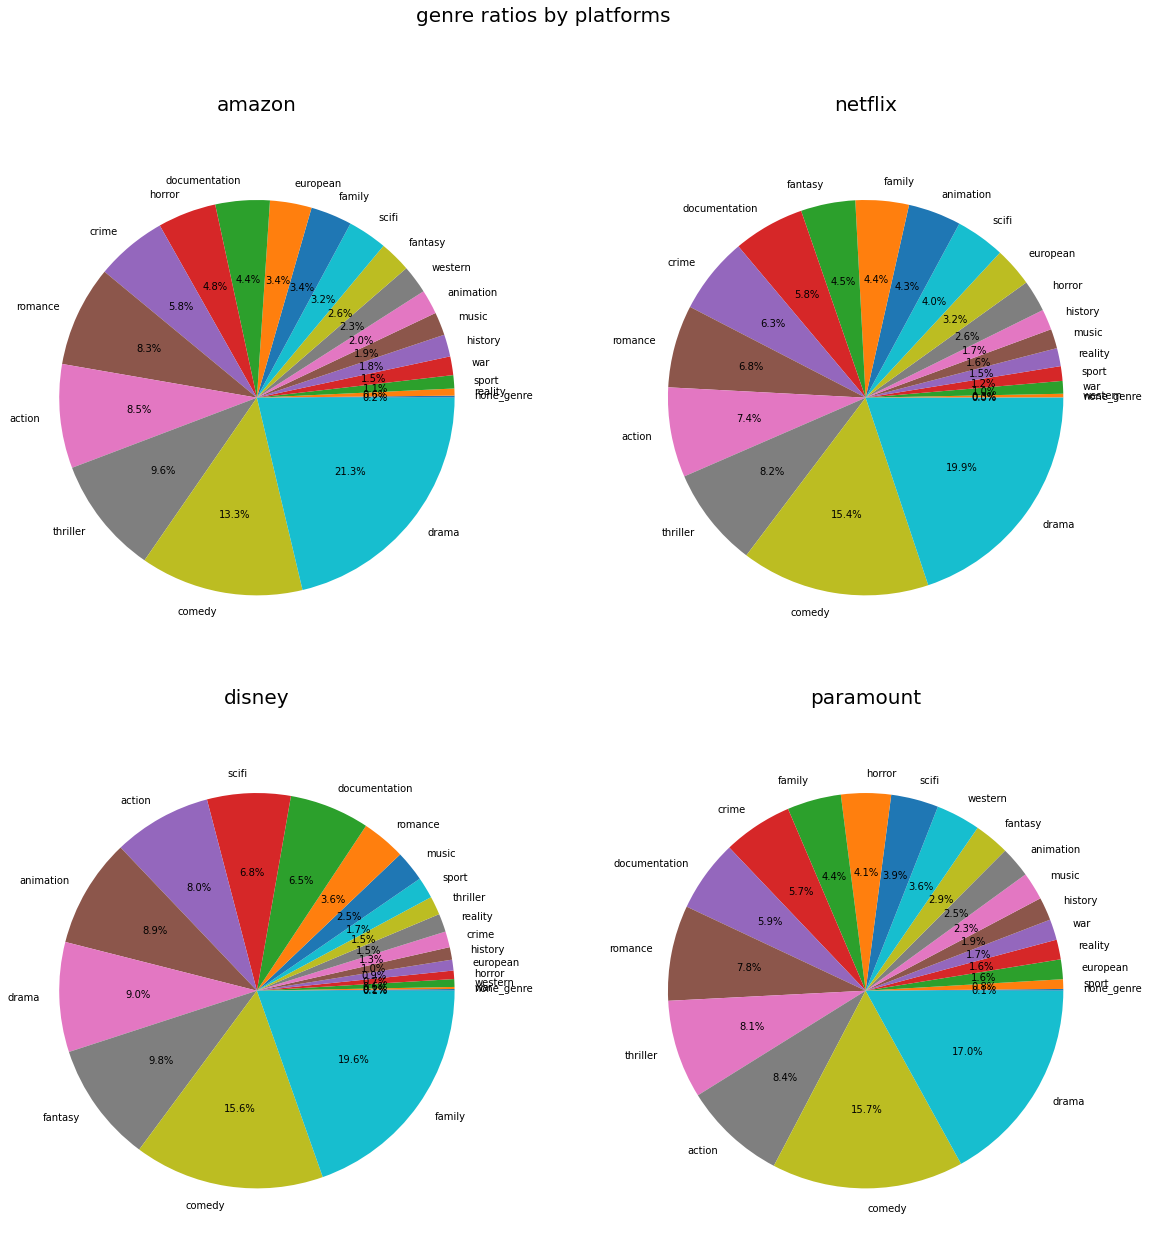

In [44]:
# 장르가 너무 많아서 상위 15개국만 봄
top_rank = 20

plt.figure(figsize=(20, 20))
for i, platform_name in enumerate(platform_names):
    data = titles.loc[titles["platform"] == platform_name]
    data, labels = make_data_labels(data)

    plt.subplot(2, 2, i+1)
    plt.pie(data[:top_rank], labels=labels[:top_rank], autopct='%0.1f%%')
    plt.title(platform_name, fontsize=20, pad=40)

plt.suptitle('genre ratios by platforms',fontsize=20)
plt.show()

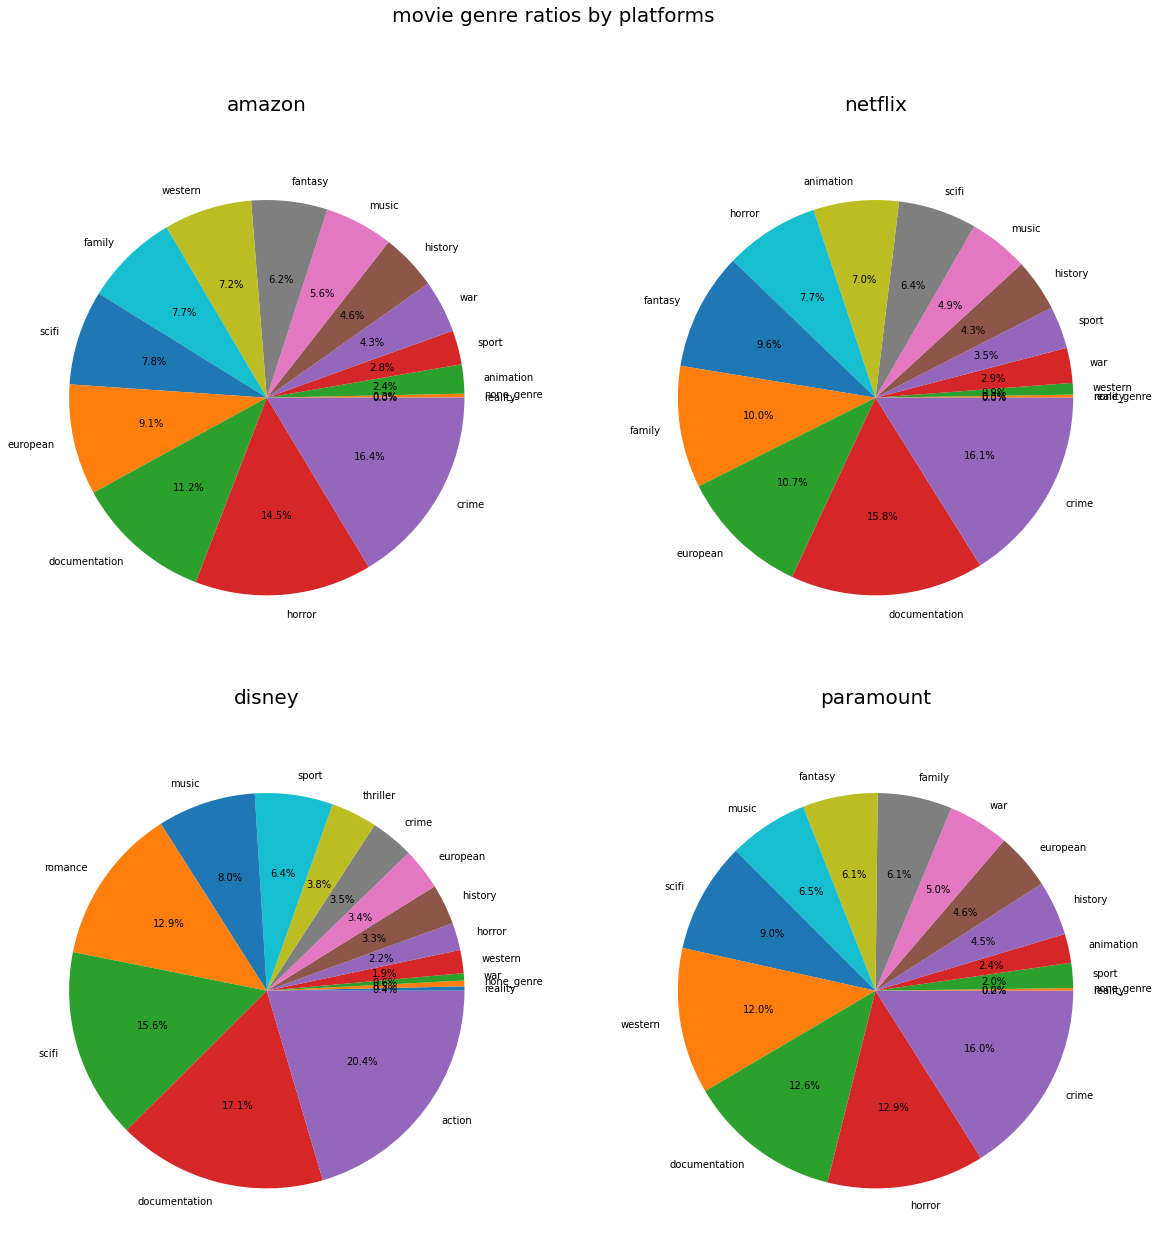

In [31]:
# 장르가 너무 많아서 상위 15개국만 봄
top_rank = 20

plt.figure(figsize=(20, 20))
for i, platform_name in enumerate(platform_names):
    data = titles.loc[titles["platform"] == platform_name]
    data = data.loc[data["type"] == "MOVIE"]
    data, labels = make_data_labels(data)

    plt.subplot(2, 2, i+1)
    plt.pie(data[:top_rank], labels=labels[:top_rank], autopct='%0.1f%%')
    plt.title(platform_name, fontsize=20, pad=40)

plt.suptitle('movie genre ratios by platforms',fontsize=20)
plt.show()

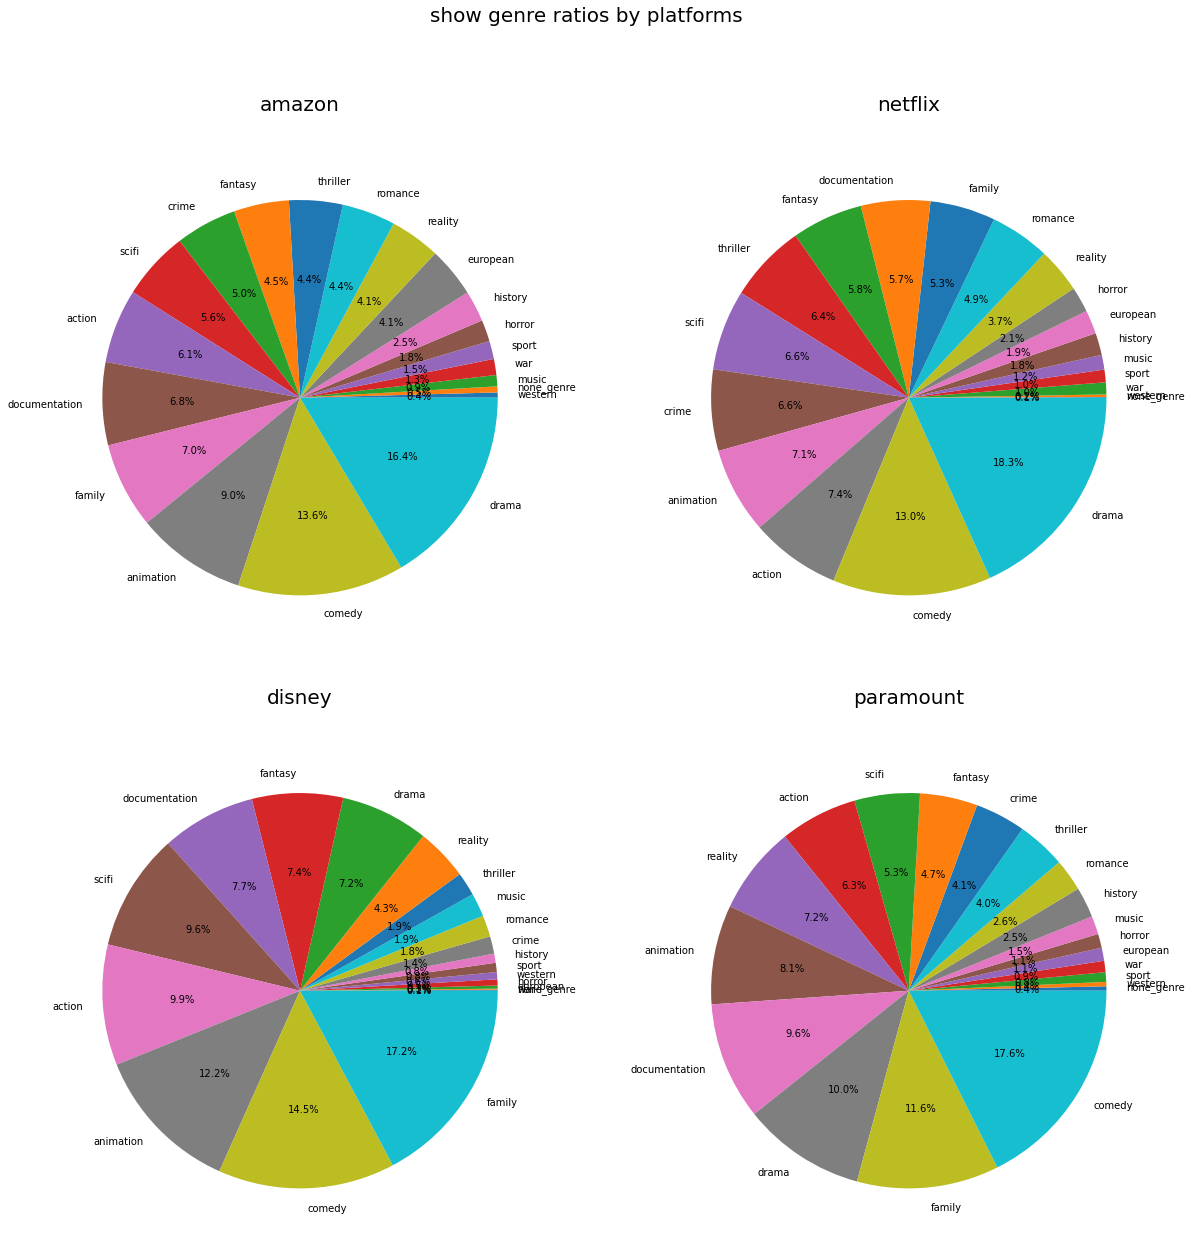

In [43]:
# 장르가 너무 많아서 상위 15개국만 봄
top_rank = 20

plt.figure(figsize=(20, 20))
for i, platform_name in enumerate(platform_names):
    data = titles.loc[titles["platform"] == platform_name]
    data = data.loc[data["type"] == "SHOW"]
    data, labels = make_data_labels(data)

    plt.subplot(2, 2, i+1)
    plt.pie(data[:top_rank], labels=labels[:top_rank], autopct='%0.1f%%')
    plt.title(platform_name, fontsize=20, pad=40)

plt.suptitle('show genre ratios by platforms',fontsize=20)
plt.show()

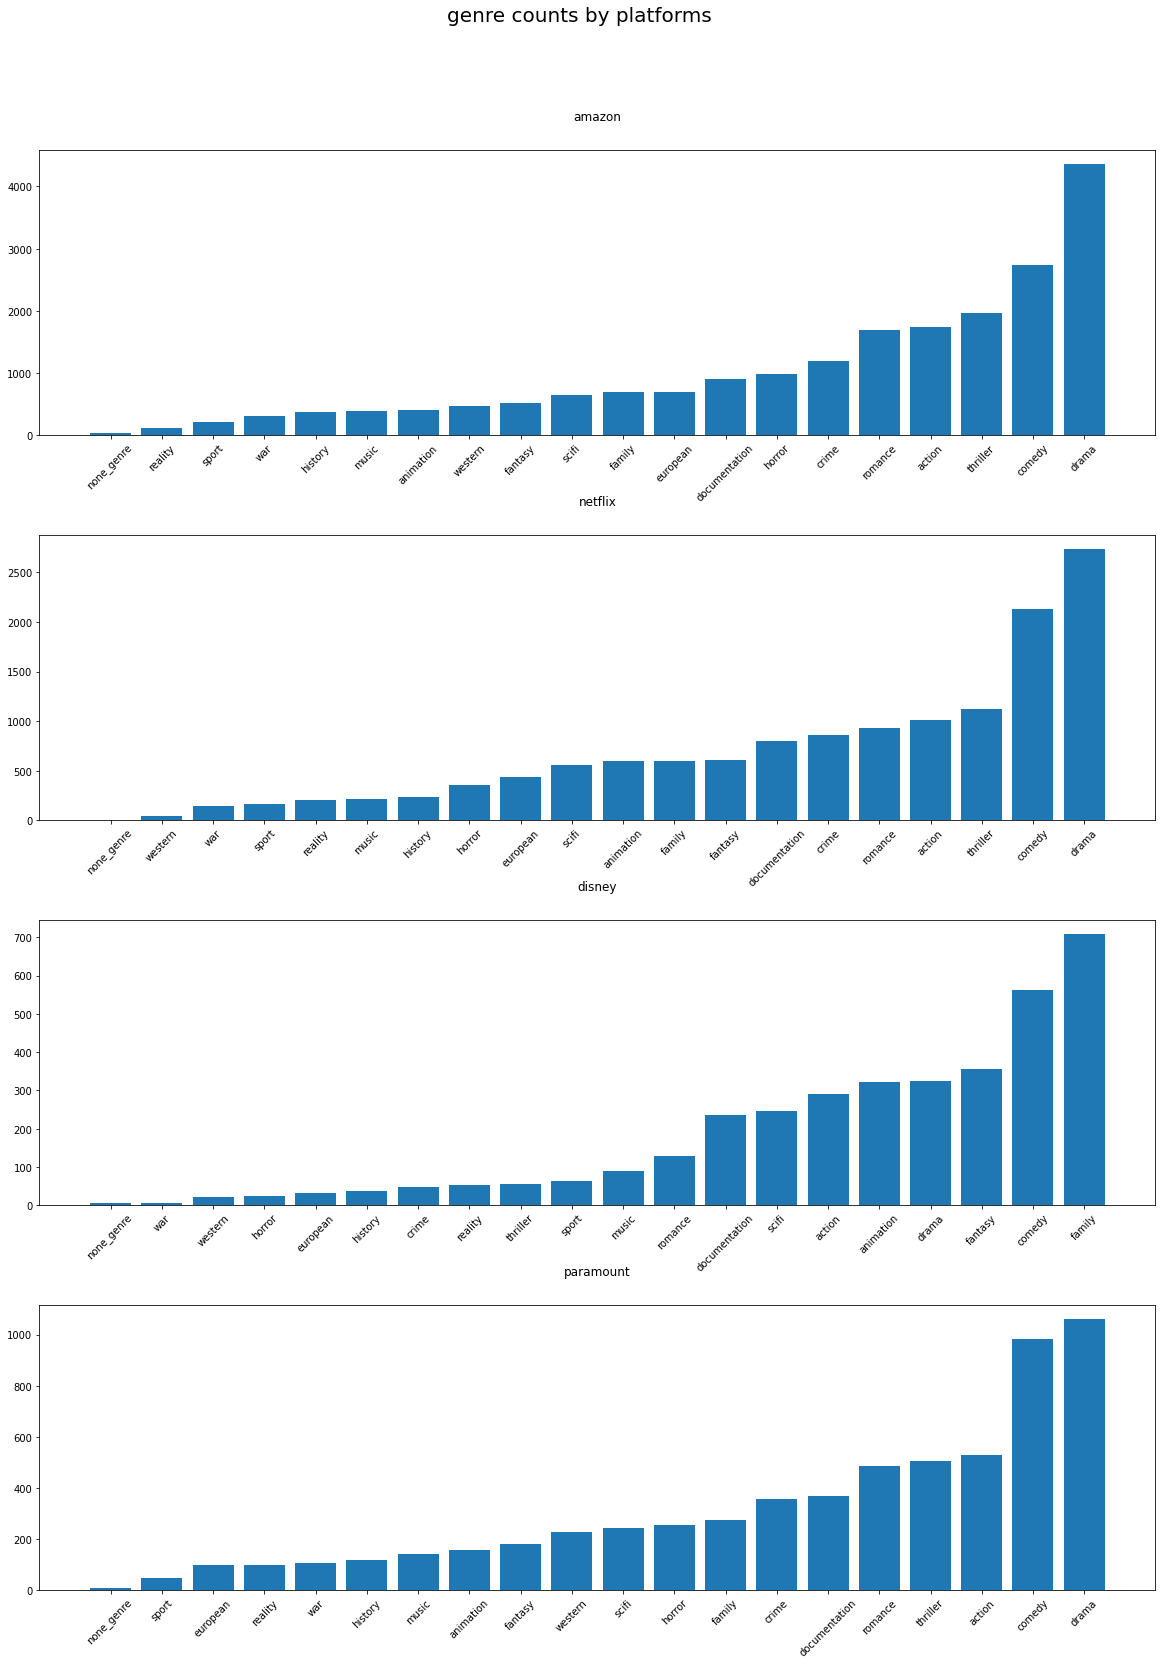

In [33]:
plt.figure(figsize=(20, 25))
for i, platform_name in enumerate(platform_names):
    data = titles.loc[titles["platform"] == platform_name]
    data, labels = make_data_labels(data)

    plt.subplot(4, 1, i+1)
    plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)
    plt.bar(labels, data)
    plt.xticks(rotation=45)
    plt.title(platform_name, pad=30)

plt.suptitle('genre counts by platforms',fontsize=20)
plt.show()

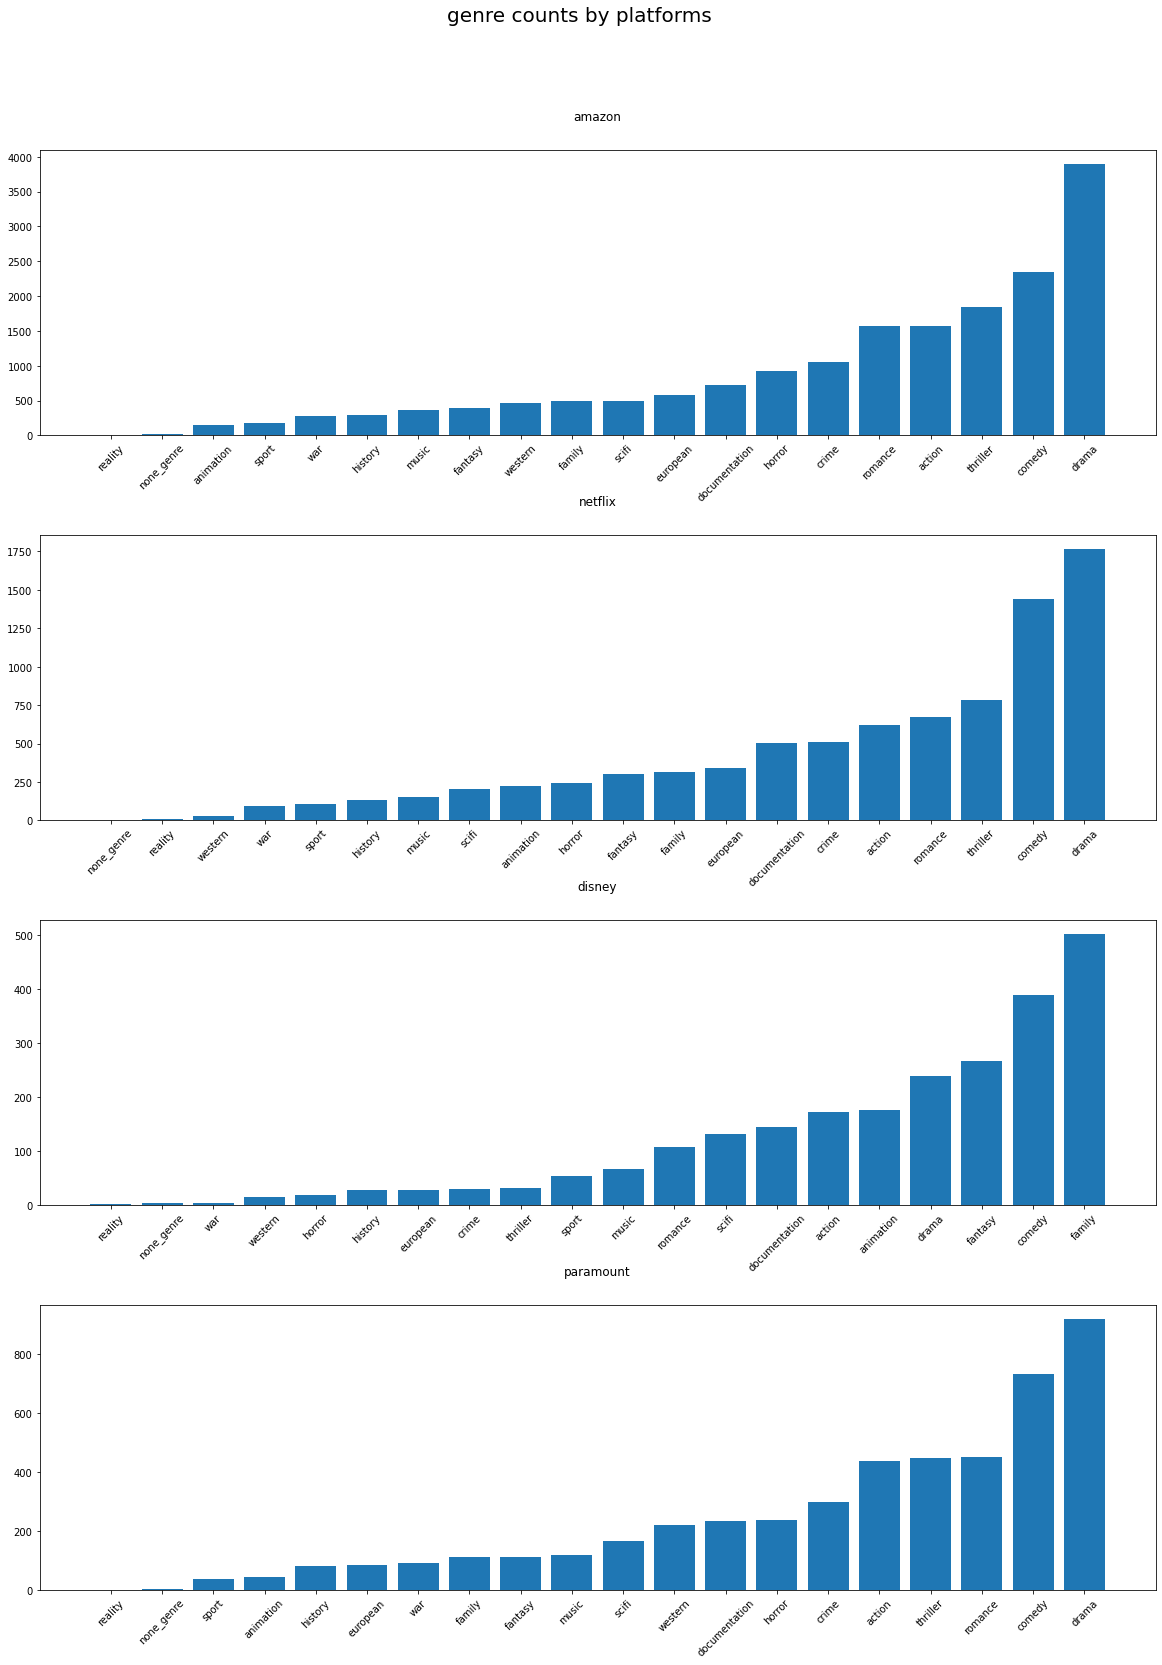

In [34]:
plt.figure(figsize=(20, 25))
for i, platform_name in enumerate(platform_names):
    data = titles.loc[titles["platform"] == platform_name]
    data = data.loc[data["type"] == "MOVIE"]
    data, labels = make_data_labels(data)

    plt.subplot(4, 1, i+1)
    plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)
    plt.bar(labels, data)
    plt.xticks(rotation=45)
    plt.title(platform_name, pad=30)

plt.suptitle('genre counts by platforms',fontsize=20)
plt.show()

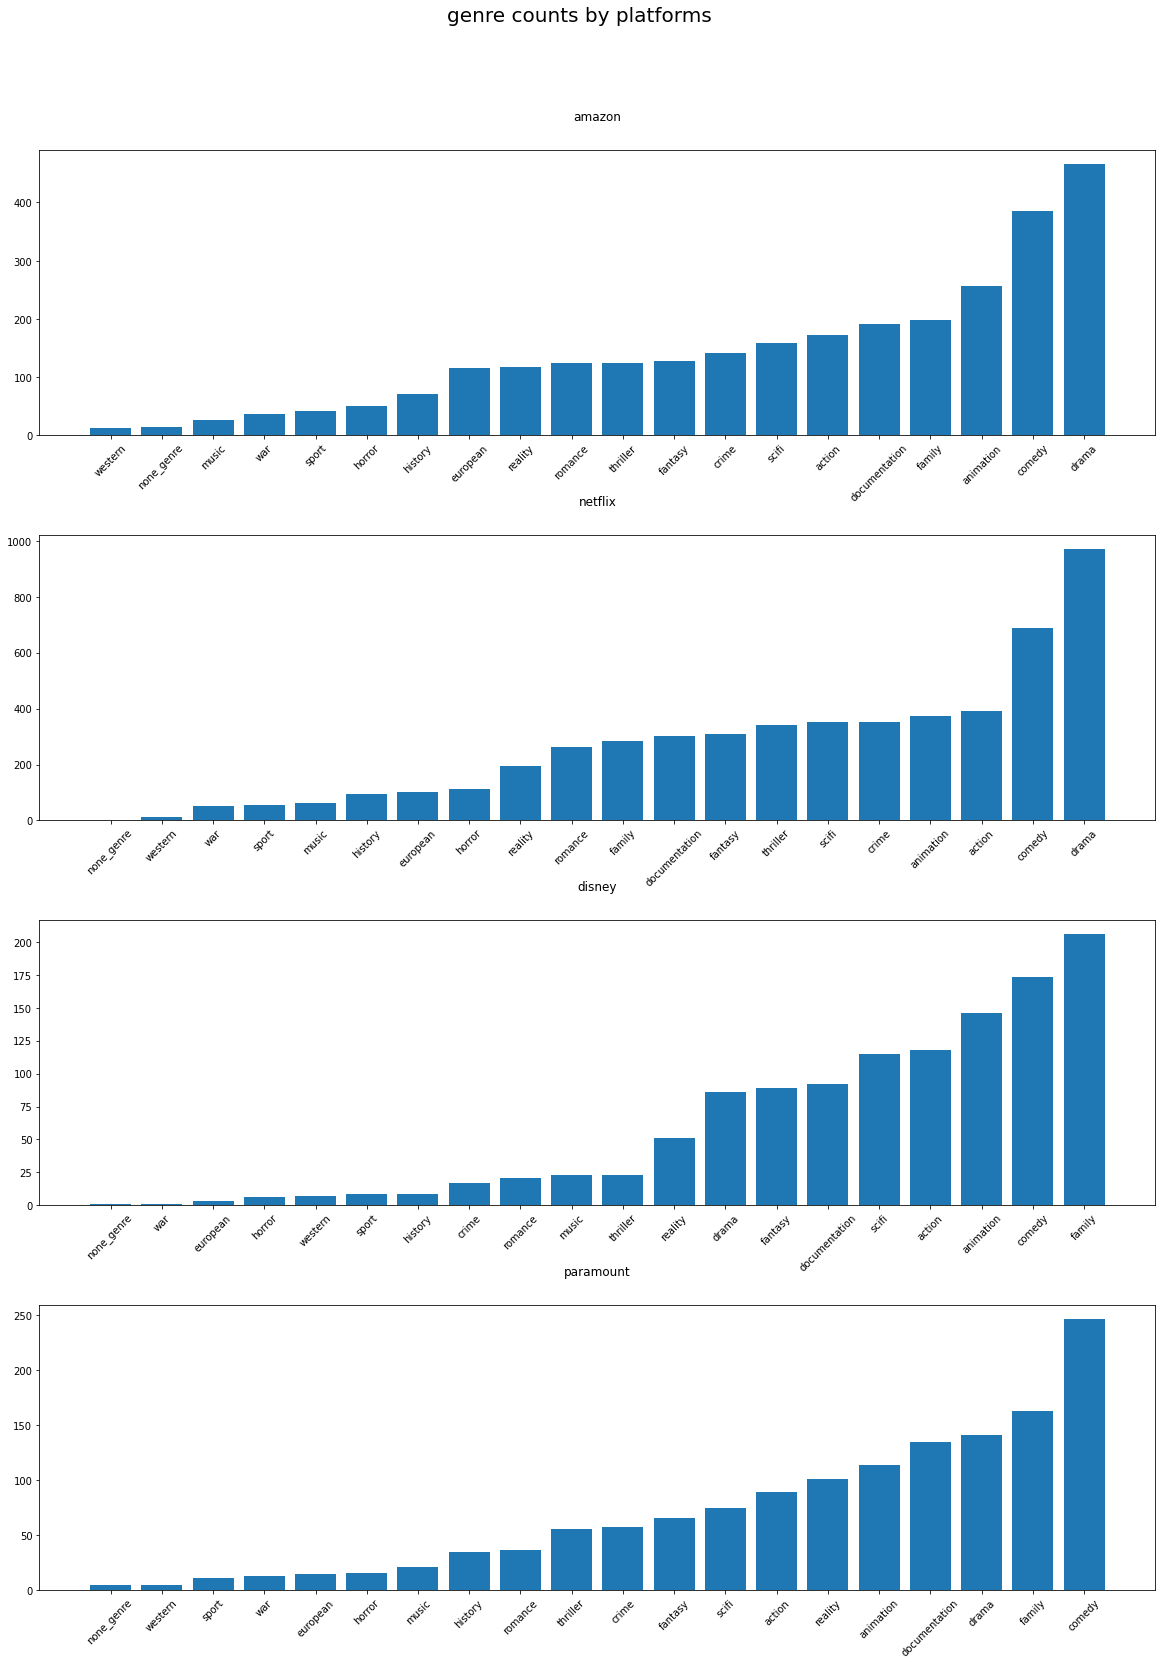

In [35]:
plt.figure(figsize=(20, 25))
for i, platform_name in enumerate(platform_names):
    data = titles.loc[titles["platform"] == platform_name]
    data = data.loc[data["type"] == "SHOW"]
    data, labels = make_data_labels(data)

    plt.subplot(4, 1, i+1)
    plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)
    plt.bar(labels, data)
    plt.xticks(rotation=45)
    plt.title(platform_name, pad=30)

plt.suptitle('genre counts by platforms',fontsize=20)
plt.show()

### 국가

In [36]:
# titles.columns[15:156]

In [37]:
def make_country_data_labels(titles):
    # 데이터 프레임 값 생성
    country_counts = titles.iloc[:, 15:156]
    country_data = list(country_counts.sum())
    country_names = country_counts.sum().index.tolist()

    # 데이터 정렬
    index = np.argsort(np.array(country_data))[::-1]
    data = []
    labels = []
    for i in index:
        data.append(country_data[i])
        labels.append(country_names[i])

    return data, labels

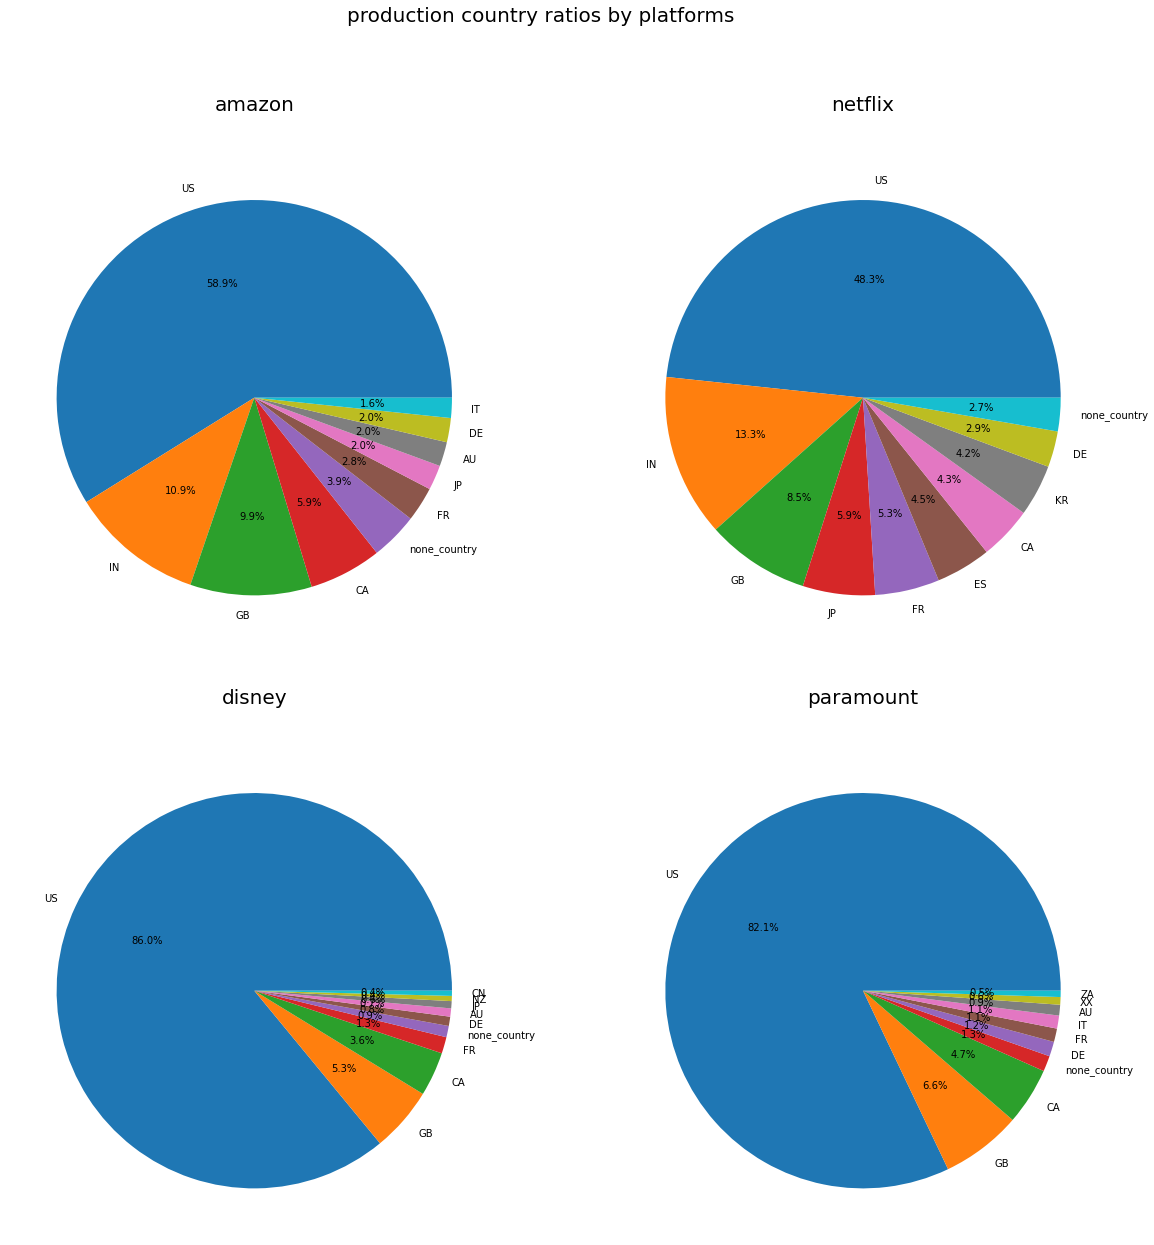

In [47]:
# 나라가 너무 많아서 상위 10개국만 봄
top_rank = 10

plt.figure(figsize=(20, 20))
for i, platform_name in enumerate(platform_names):
    data = titles.loc[titles["platform"] == platform_name]
    data, labels = make_country_data_labels(data)

    plt.subplot(2, 2, i+1)
    plt.pie(data[:top_rank], labels=labels[:top_rank], autopct='%0.1f%%')
    plt.title(platform_name, fontsize=20, pad=40)

plt.suptitle('production country ratios by platforms',fontsize=20)
plt.show()

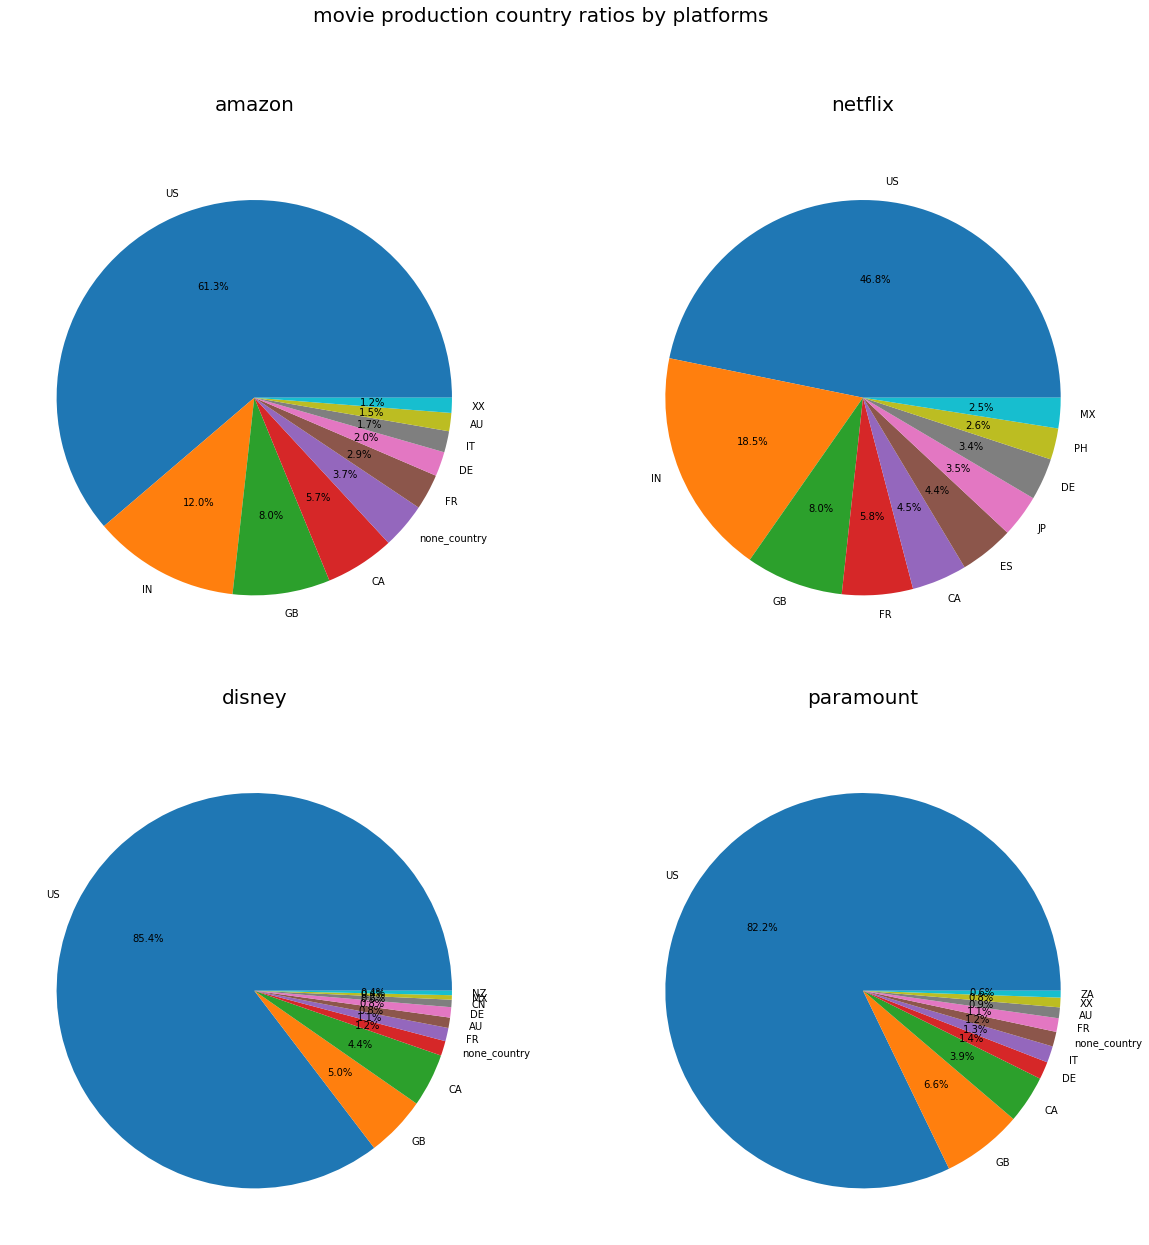

In [39]:
# 나라가 너무 많아서 상위 10개국만 봄
top_rank = 10

plt.figure(figsize=(20, 20))
for i, platform_name in enumerate(platform_names):
    data = titles.loc[titles["platform"] == platform_name]
    data = data.loc[data["type"] == "MOVIE"]
    data, labels = make_country_data_labels(data)

    plt.subplot(2, 2, i+1)
    plt.pie(data[:top_rank], labels=labels[:top_rank], autopct='%0.1f%%')
    plt.title(platform_name, fontsize=20, pad=40)

plt.suptitle('movie production country ratios by platforms',fontsize=20)
plt.show()

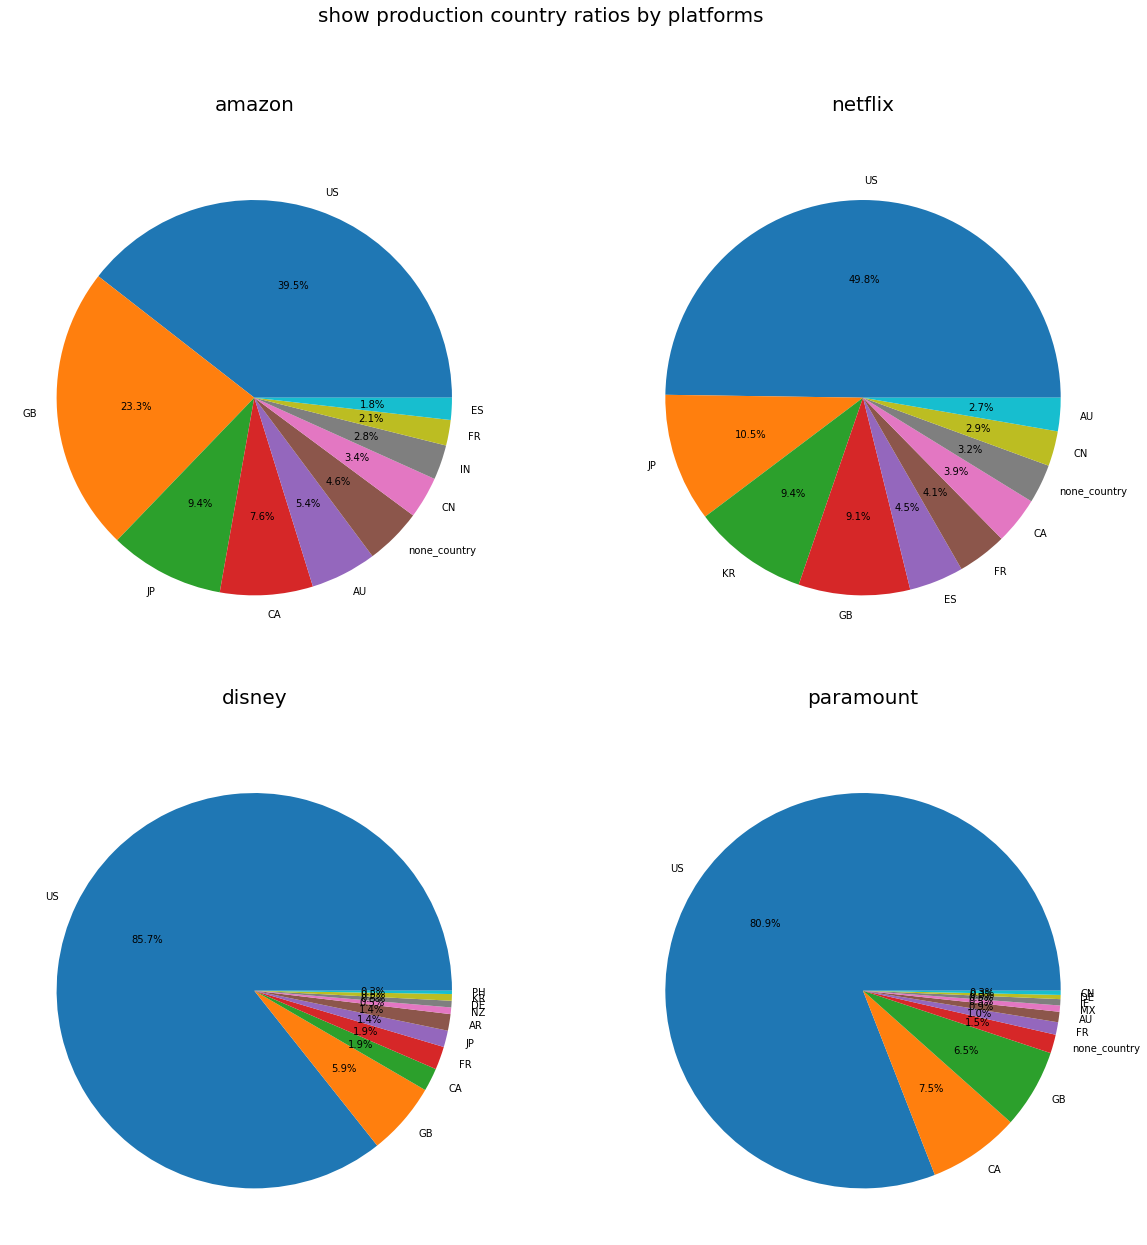

In [40]:
# 나라가 너무 많아서 상위 10개국만 봄
top_rank = 10

plt.figure(figsize=(20, 20))
for i, platform_name in enumerate(platform_names):
    data = titles.loc[titles["platform"] == platform_name]
    data = data.loc[data["type"] == "SHOW"]
    data, labels = make_country_data_labels(data)

    plt.subplot(2, 2, i+1)
    plt.pie(data[:top_rank], labels=labels[:top_rank], autopct='%0.1f%%')
    plt.title(platform_name, fontsize=20, pad=40)

plt.suptitle('show production country ratios by platforms',fontsize=20)
plt.show()